In [1]:
from scipy.optimize import curve_fit
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline 
import seaborn as sns
import pandas as pd
from matplotlib import gridspec

# Dados de tempo


In [2]:
# Todos os valores de tempo encontram-se em segundos.
#Carrinho com 222.31g

t_1_10 = [0.392, 0.552, 0.678, 0.782]

t_2_10 = [0.391, 0.551, 0.677, 0.781]

t_3_10 = [0.392, 0.552, 0.678, 0.781]

t_4_10 = [0.392, 0.552, 0.678, 0.781]

t_5_10 = [0.392, 0.551, 0.678, 0.781]

t_10 = [[0.392,0.391,0.392, 0.392, 0.392], [0.552, 0.551, 0.552, 0.552, 0.551], 
        [0.678, 0.677, 0.678, 0.678, 0.678], [0.782, 0.781, 0.781, 0.781, 0.781]]



#Carrinho com 219.37g

t_1_9 = [0.382, 0.539, 0.661, 0.762]

t_2_9 = [0.385, 0.541, 0.663, 0.764]

t_3_9 = [0.388, 0.542, 0.655, 0.765]

t_4_9 = [0.387, 0.541, 0.655, 0.763]

t_5_9 = [0.386, 0.542, 0.654, 0.763]

t_9 = [[0.382, 0.385, 0.388, 0.387, 0.386], [0.539, 0.541, 0.542, 0.541, 0.542],
      [0.661, 0.663, 0.655, 0.655, 0.654], [0.762, 0.764, 0.765, 0.763, 0.763]]


#Carrinho com 218.32g

t_1_8 = [0.381, 0.534, 0.646, 0.754]

t_2_8 = [0.383, 0.536, 0.649, 0.757]

t_3_8 = [0.382, 0.535, 0.648, 0.756]

t_4_8 = [0.381, 0.534, 0.647, 0.755]

t_5_8 = [0.382, 0.536, 0.648, 0.756]

t_8 = [[0.381,0.383, 0.382, 0.381, 0.382], [0.534, 0.536, 0.535, 0.534, 0.536],
      [0.646, 0.649,0.648, 0.647, 0.648], [0.754, 0.757, 0.756, 0.755, 0.756]]

#Carrinho com 216.30g

t_1_7 = [0.373, 0.524, 0.636, 0.742]

t_2_7 = [0.374, 0.525, 0.636, 0.742]

t_3_7 = [0.376, 0.526, 0.637, 0.741]

t_4_7 = [0.369, 0.522, 0.633, 0.737]

t_5_7 = [0.377, 0.526, 0.638, 0.741]

t_7 = [[0.373, 0.374, 0.376, 0.369, 0.377], [0.524, 0.525, 0.526, 0.522, 0.526],
      [0.636, 0.636, 0.637, 0.633, 0.638], [0.742, 0.742, 0.741, 0.737, 0.741]]





#S2 TE AMO MUITO MUITO S2 S2 S2 S2 S2 S2 S2 S2 S2 S2 S2


# Dados de posição

In [3]:
s = np.array([180.0-165.0, 180.0 - 150.0, 180.0 - 135.0, 180.0 - 120.0])*1e-2 #m

sigma_s = np.full(len(s), np.round(np.sqrt((np.sqrt(2)*0.05e-2)**2 + (1.5e-2/2)**2),3))
print(s,sigma_s)


[0.15 0.3  0.45 0.6 ] [0.008 0.008 0.008 0.008]


# Dados de massa

In [4]:
m_c = np.array([222.31, 219.37, 218.32, 216.30])*1e-3 #kg
m_s = np.array([54.53, 57.48, 58.47, 60.50])*1e-3 #kg

sigma_m_s = np.full(len(m_s), 1e-4) #kg
sigma_m_c = np.full(len(m_c), 1e-4) #kg

# Valor médio do tempo em cada posição por configuração de massa


In [5]:
#Valor médio do tempo 10g
t_10_mean = np.array([np.mean(t_10[0]), np.mean(t_10[1]), np.mean(t_10[2]), np.mean(t_10[3])])

sigma_10_mean = np.array([np.std(t_10[0])/2, np.std(t_10[1])/2, np.std(t_10[2])/2, np.std(t_10[3])/2])
sigma_10_mean = np.sqrt(sigma_10_mean**2 + 5e-4**2)
sigma_10_mean = [float('{:g}'.format(float('{:.1g}'.format(sigma)))) for sigma in sigma_10_mean]

#Valor médio do tempo 9g
t_9_mean = np.array([np.mean(t_9[0]), np.mean(t_9[1]), np.mean(t_9[2]), np.mean(t_9[3])])

sigma_9_mean = np.array([np.std(t_9[0])/2, np.std(t_9[1])/2, np.std(t_9[2])/2, np.std(t_9[3])/2])
sigma_9_mean = np.sqrt(sigma_9_mean**2 + 5e-4**2)
sigma_9_mean = [float('{:g}'.format(float('{:.1g}'.format(sigma)))) for sigma in sigma_9_mean]

#Valor médio do tempo 8g
t_8_mean = np.array([np.mean(t_8[0]), np.mean(t_8[1]), np.mean(t_8[2]), np.mean(t_8[3])])
sigma_8_mean = np.array([np.std(t_8[0])/2, np.std(t_8[1])/2, np.std(t_8[2])/2, np.std(t_8[3])/2])
sigma_8_mean = np.sqrt(sigma_8_mean**2 + 5e-4**2)
sigma_8_mean = [float('{:g}'.format(float('{:.1g}'.format(sigma)))) for sigma in sigma_8_mean]

#Valor médio do tempo 7g
t_7_mean = np.array([np.mean(t_7[0]), np.mean(t_7[1]), np.mean(t_7[2]), np.mean(t_7[3])])

sigma_7_mean = np.array([np.std(t_7[0])/2, np.std(t_7[1])/2, np.std(t_7[2])/2, np.std(t_7[3])/2])
sigma_7_mean = np.sqrt(sigma_7_mean**2 + 5e-4**2)
sigma_7_mean = [float('{:g}'.format(float('{:.1g}'.format(sigma)))) for sigma in sigma_7_mean]



In [6]:
print("t_10_mean:", t_10_mean)
print("sigma_10_mean:", sigma_10_mean)
print()
print("t_9_mean:", t_9_mean)
print("sigma_9_mean:", sigma_9_mean)
print()
print("t_8_mean:", t_8_mean)
print("sigma_8_mean:", sigma_8_mean)
print()
print("t_7_mean:", t_7_mean)
print("sigma_7_mean:", sigma_7_mean)
print()


t_10_mean: [0.3918 0.5516 0.6778 0.7812]
sigma_10_mean: [0.0005, 0.0006, 0.0005, 0.0005]

t_9_mean: [0.3856 0.541  0.6576 0.7634]
sigma_9_mean: [0.001, 0.0007, 0.002, 0.0007]

t_8_mean: [0.3818 0.535  0.6476 0.7556]
sigma_8_mean: [0.0006, 0.0007, 0.0007, 0.0007]

t_7_mean: [0.3738 0.5246 0.636  0.7406]
sigma_7_mean: [0.001, 0.0009, 0.001, 0.001]



# Gráficos dos dados brutos

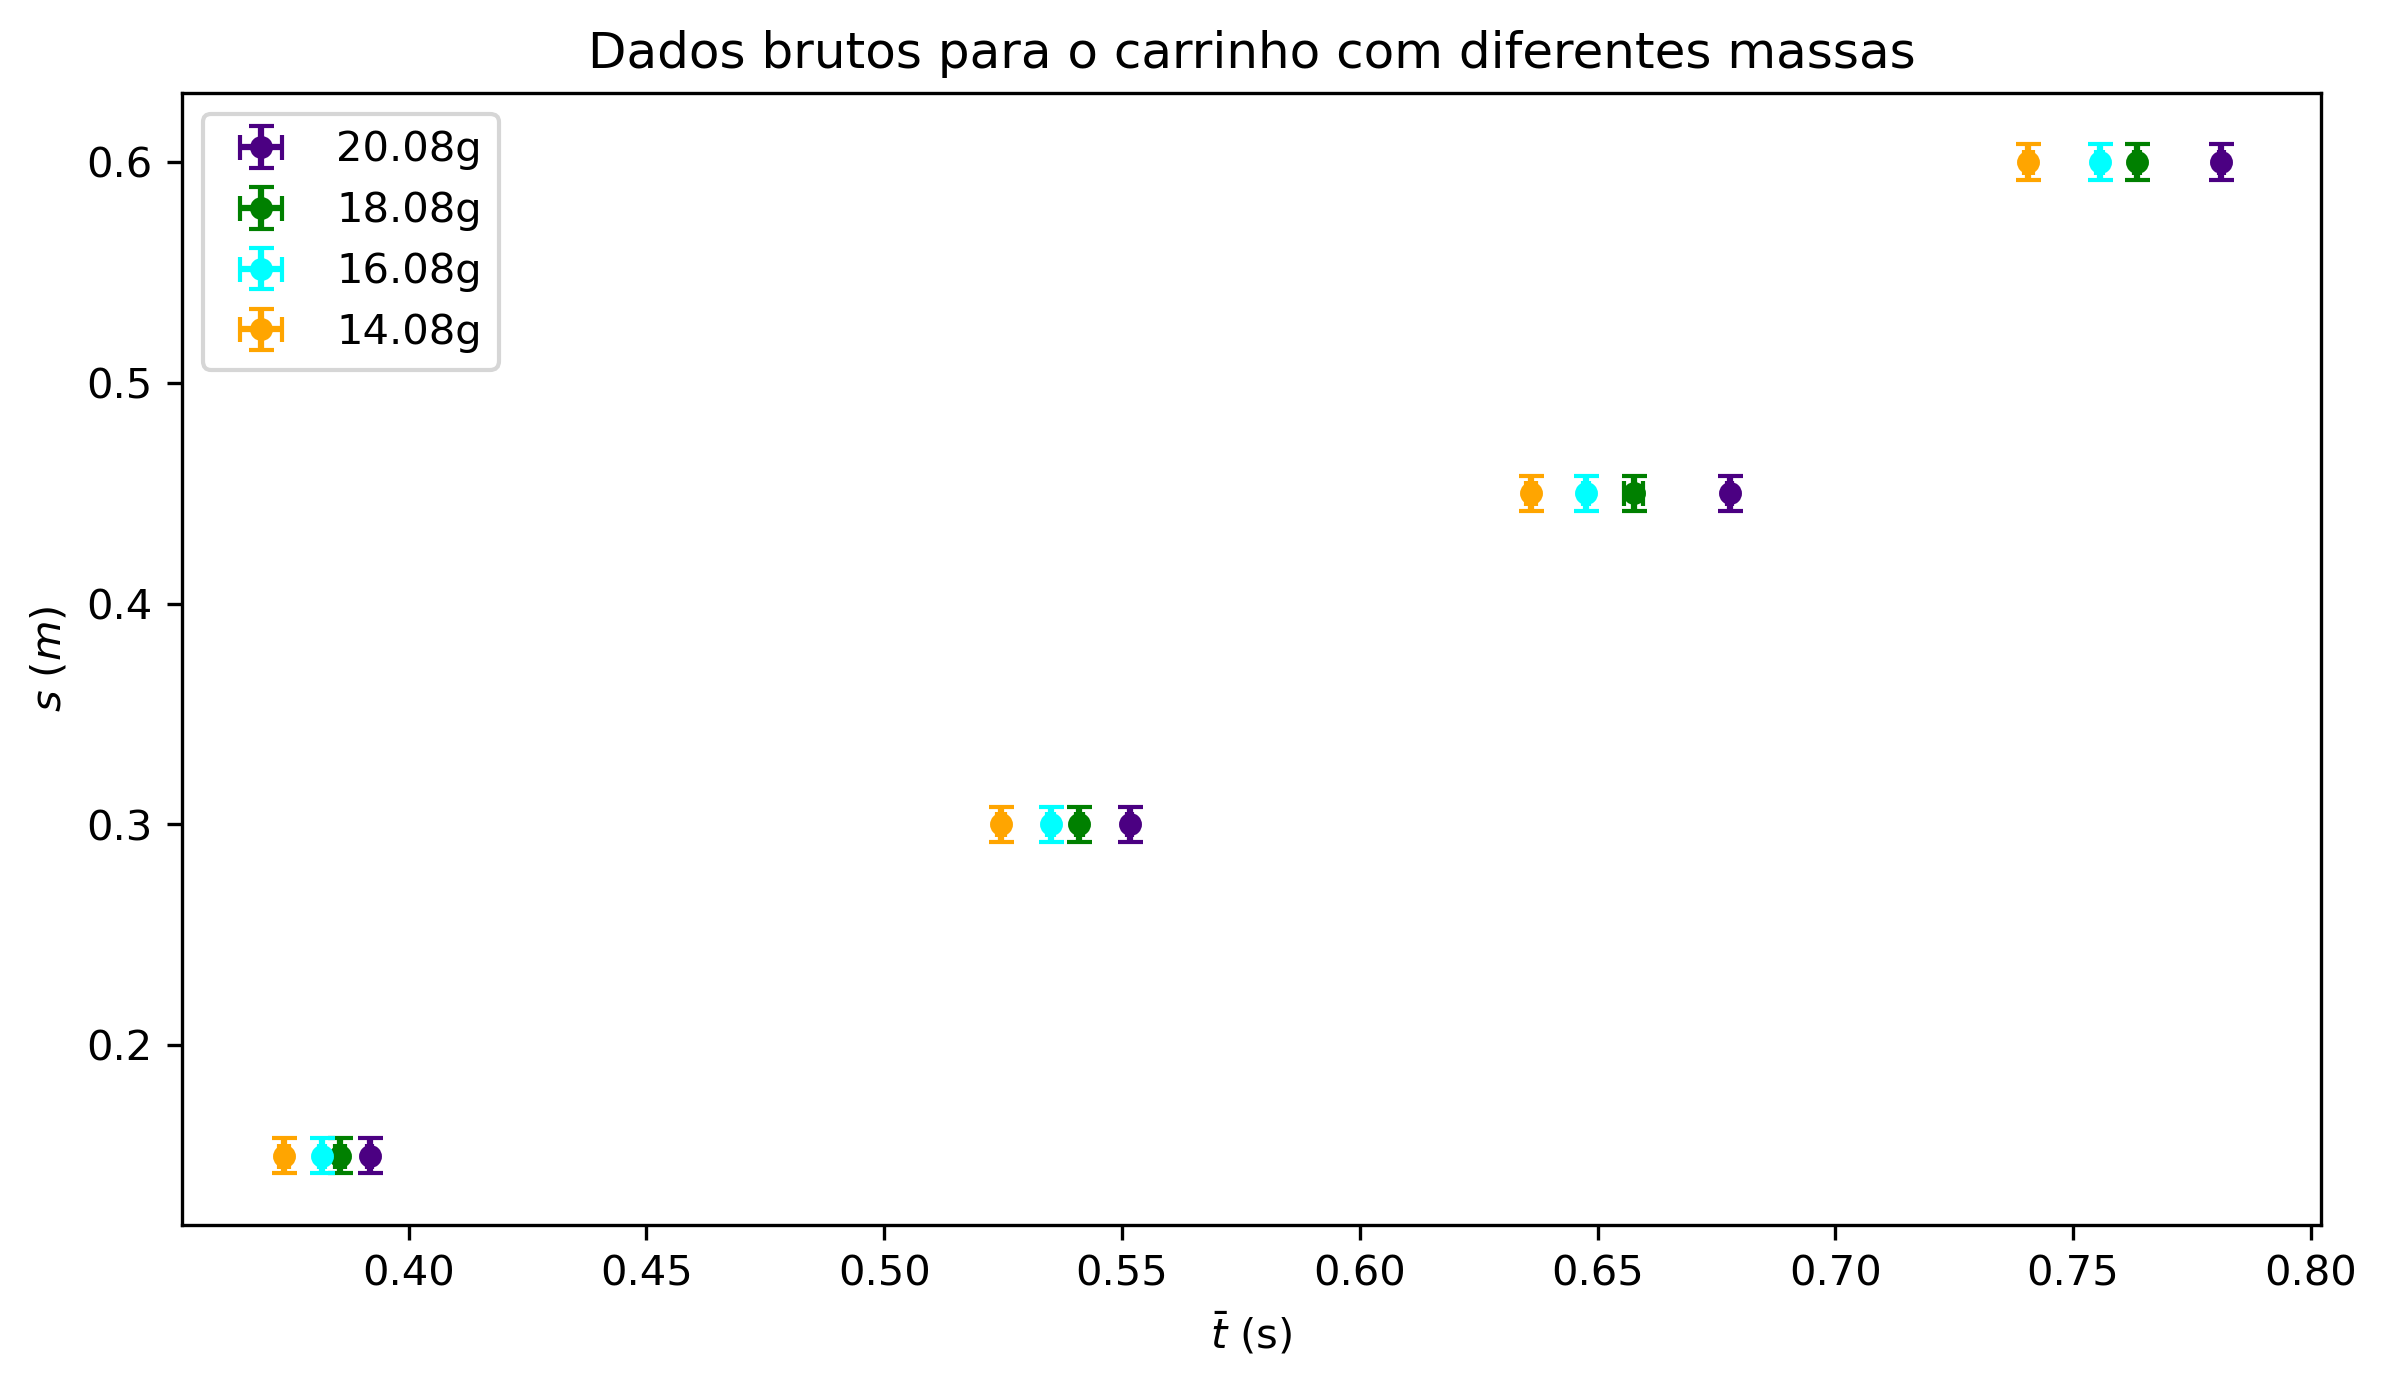

In [7]:
plt.figure(figsize = [9.2,4.9], dpi = 300) 
plt.errorbar(t_10_mean,s,sigma_s,sigma_10_mean, 'o', ms = 4.5, capsize=3, color = 'indigo', label = '20.08g')
plt.errorbar(t_9_mean,s,sigma_s,sigma_9_mean, 'o', ms = 4.5, capsize=3, color = 'green', label = '18.08g')
plt.errorbar(t_8_mean,s,sigma_s,sigma_8_mean, 'o', ms = 4.5, capsize=3, color = 'cyan', label = '16.08g')
plt.errorbar(t_7_mean,s,sigma_s,sigma_7_mean, 'o', ms = 4.5, capsize=3, color = 'orange', label = '14.08g')
plt.ylabel(r'$s$ ($m$)')
plt.xlabel(r'$\bar{t}$ (s)')
plt.title('Dados brutos para o carrinho com diferentes massas')
plt.legend()
#plt.savefig('Graphs/ChargeMass/Dadosbrutos.pdf')
plt.show()

# Linearização dos dados

Podemos perceber um comportamento parabólico nos dados de distância por tempo. Tendo isto em vista, a relação linear deve ocorrer entre $s$ e $\bar{t}^2$. Podemos calcular $\bar{t}^2$ a partir dos dados da tabela. Além disto, sua incerteza pode ser obtida propagando o erro de $\bar{t}$ da seguinte forma:

$$\sigma_{\bar{t}^2} = \bigg\vert \frac{d \bar{t}^2}{d\bar{t}}\bigg\vert \sigma_{\bar{t}} = 2 \bar{t} \sigma_{\bar{t}}$$

In [8]:
#10g de cada lado
t_sq_10 = t_10_mean**2

sigma_10_sq = 2*t_10_mean*sigma_10_mean
sigma_10_sq = [float('{:g}'.format(float('{:.1g}'.format(sigma)))) for sigma in sigma_10_sq]

#9g de cada lado
t_sq_9 = t_9_mean**2

sigma_9_sq = 2*t_9_mean*sigma_9_mean
sigma_9_sq = [float('{:g}'.format(float('{:.1g}'.format(sigma)))) for sigma in sigma_9_sq]

#8g de cada lado
t_sq_8 = t_8_mean**2

sigma_8_sq = 2*t_8_mean*sigma_8_mean
sigma_8_sq = [float('{:g}'.format(float('{:.1g}'.format(sigma)))) for sigma in sigma_8_sq]

#7g de cada lado
t_sq_7 = t_7_mean**2

sigma_7_sq = 2*t_7_mean*sigma_7_mean
sigma_7_sq = [float('{:g}'.format(float('{:.1g}'.format(sigma)))) for sigma in sigma_7_sq]


In [9]:
print("t_10^2:", t_sq_10)
print("sigma_10^2:", sigma_10_sq)
print()
print("t_9^2:", t_sq_9)
print("sigma_9^2:", sigma_9_sq)
print()
print("t_8^2:", t_sq_8)
print("sigma_8^2:", sigma_8_sq)
print()
print("t_7^2:", t_sq_7)
print("sigma_7^2:", sigma_7_sq)
print()



t_10^2: [0.15350724 0.30426256 0.45941284 0.61027344]
sigma_10^2: [0.0004, 0.0007, 0.0007, 0.0008]

t_9^2: [0.14868736 0.292681   0.43243776 0.58277956]
sigma_9^2: [0.0008, 0.0008, 0.003, 0.001]

t_8^2: [0.14577124 0.286225   0.41938576 0.57093136]
sigma_8^2: [0.0005, 0.0007, 0.0009, 0.001]

t_7^2: [0.13972644 0.27520516 0.404496   0.54848836]
sigma_7^2: [0.0007, 0.0009, 0.001, 0.001]



# Gráfico dos dados linearizados

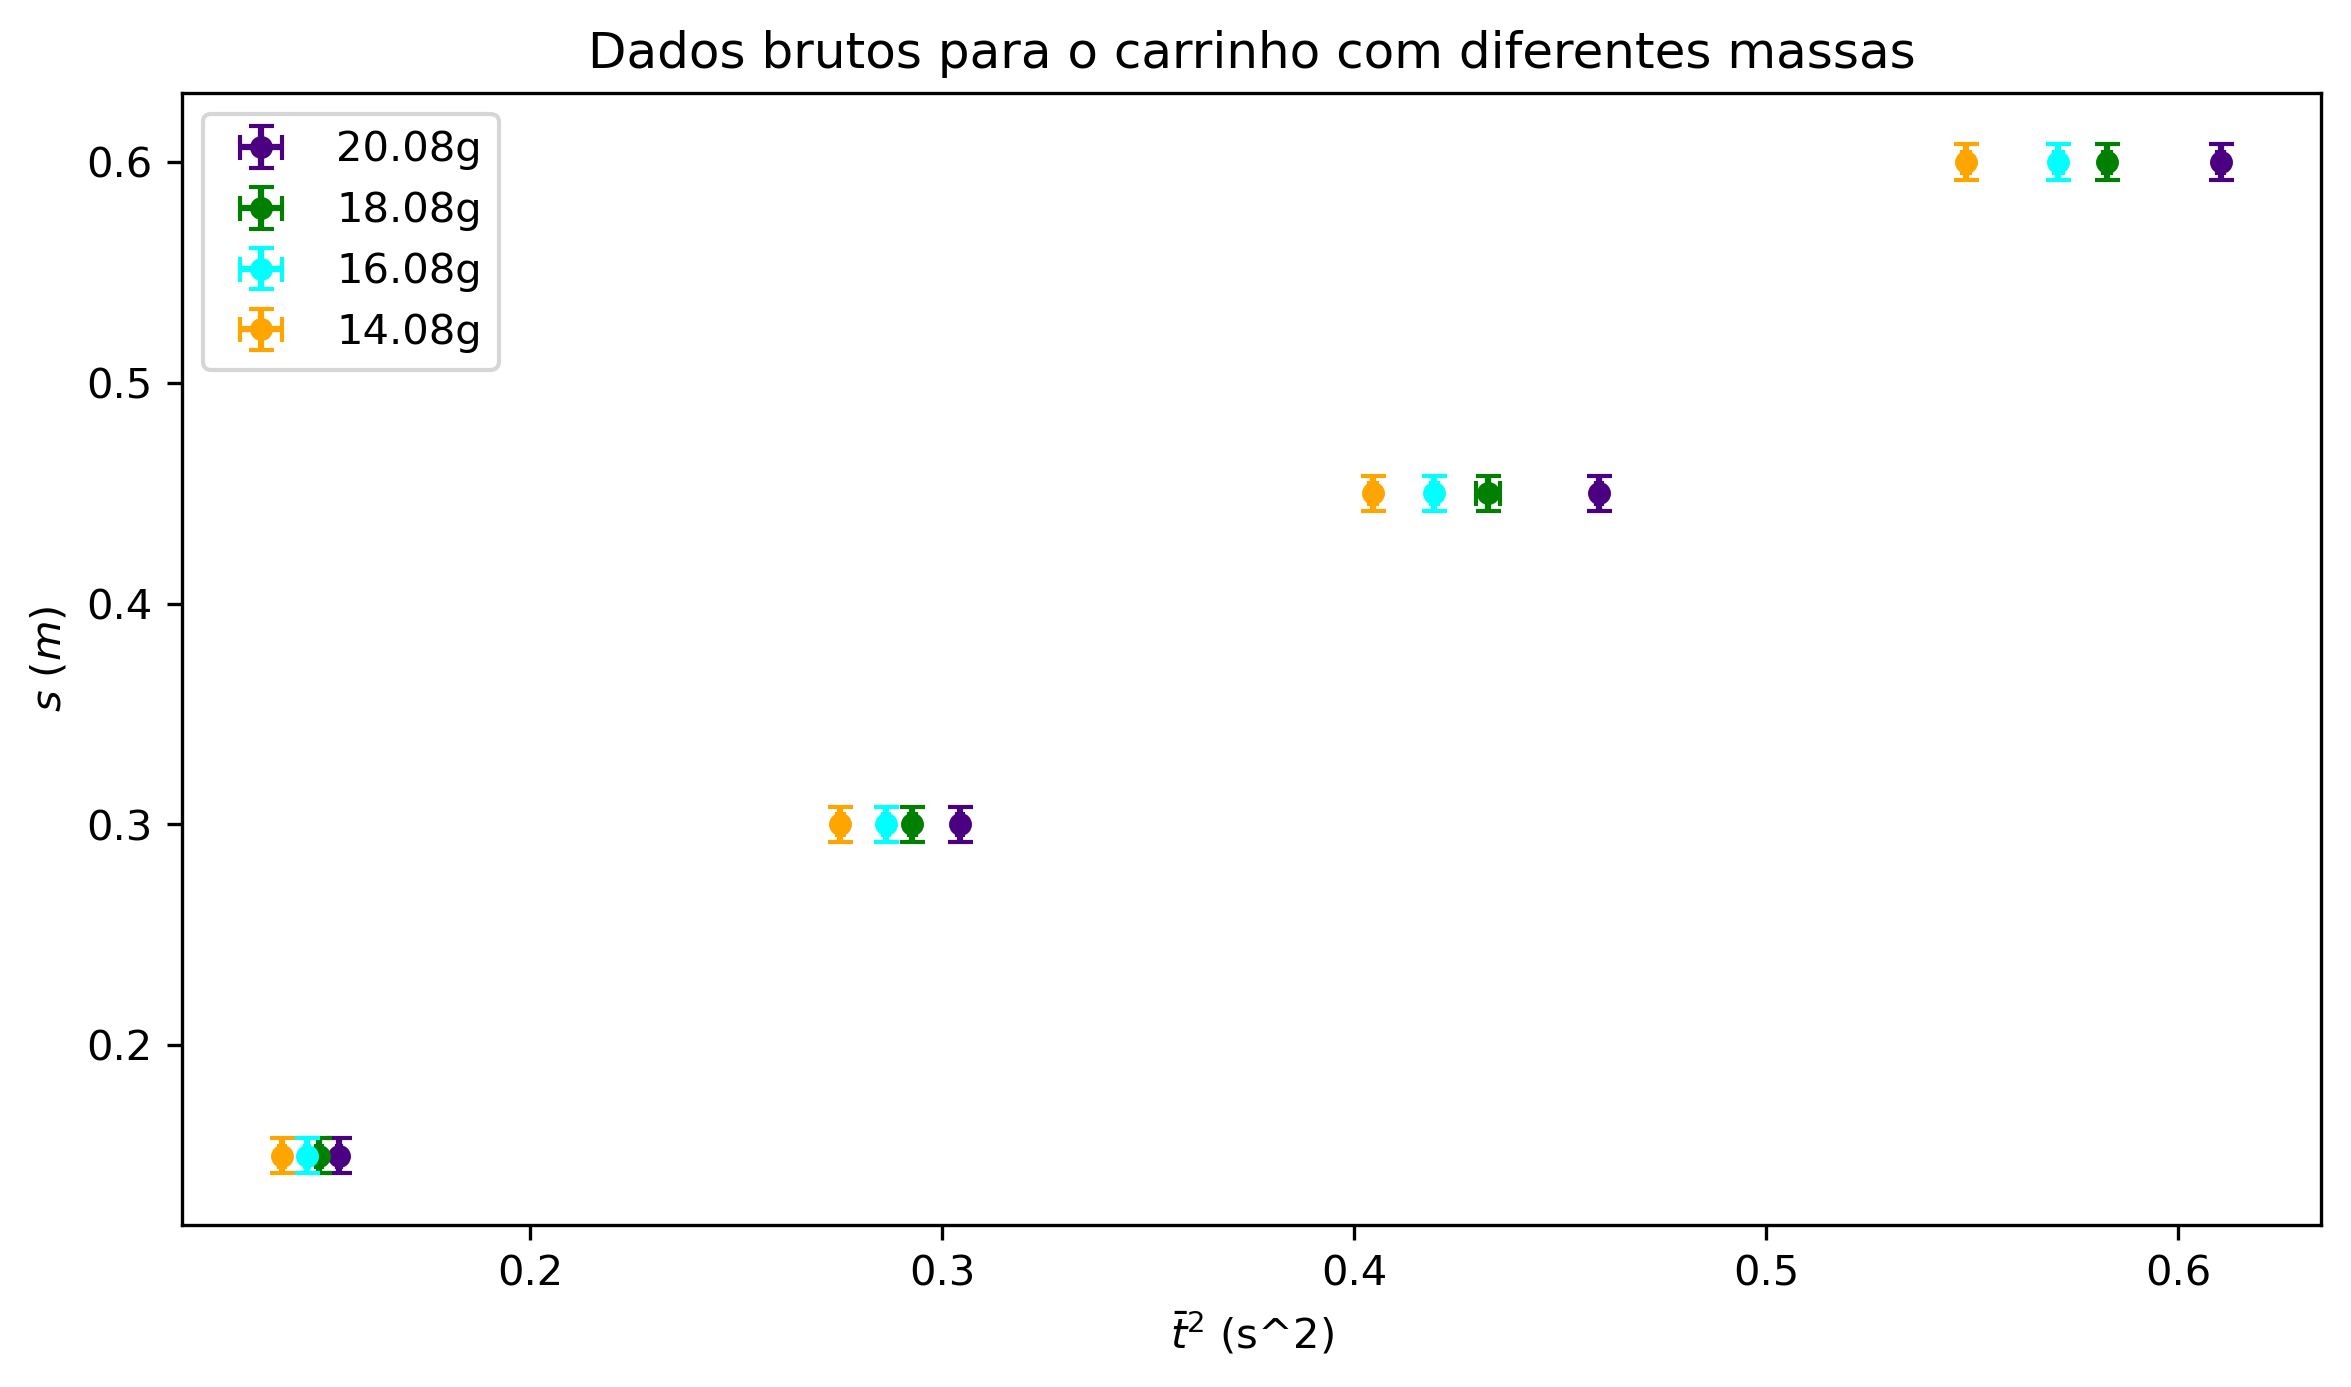

In [10]:
plt.figure(figsize = [9.2,4.9], dpi = 300) 
plt.errorbar(t_sq_10,s,sigma_s,sigma_10_sq, 'o', ms = 4.5, capsize=3, color = 'indigo', label = '20.08g')
plt.errorbar(t_sq_9,s,sigma_s,sigma_9_sq, 'o', ms = 4.5, capsize=3, color = 'green', label = '18.08g')
plt.errorbar(t_sq_8,s,sigma_s,sigma_8_sq, 'o', ms = 4.5, capsize=3, color = 'cyan', label = '16.08g')
plt.errorbar(t_sq_7,s,sigma_s,sigma_7_sq, 'o', ms = 4.5, capsize=3, color = 'orange', label = '14.08g')
plt.ylabel(r'$s$ ($m$)')
plt.xlabel(r'$\bar{t}^2$ (s^2)')
plt.title('Dados brutos para o carrinho com diferentes massas')
plt.legend()
#plt.savefig('Graphs/ChargeMass/Dadosbrutos.pdf')
plt.show()

# Ajuste linear para os dados do carrinho com 10g de cada lado

In [11]:
fitpars_10, cov_pars_10 = np.polyfit(t_sq_10,s,1,w=np.power(sigma_s,-1),cov='True')
#print(fitpars, cov_pars)

coef_angular_10 = fitpars_10[0]
coef_linear_10 = fitpars_10[1]
sigma_angular_10 = np.sqrt(cov_pars_10[0][0])
sigma_linear_10 = np.sqrt(cov_pars_10[1][1])

sigma_angular_10 = float('{:g}'.format(float('{:.1g}'.format(sigma_angular_10))))
sigma_linear_10 = float('{:g}'.format(float('{:.1g}'.format(sigma_linear_10))))

                     
print('Coeficiente angular: %.3f +- %.3f (m/s^2)' % (coef_angular_10 ,sigma_angular_10))
print('Coeficiente linear: %.3f +- %.3f (m)' %(coef_linear_10,sigma_linear_10))

Coeficiente angular: 0.983 +- 0.004 (m/s^2)
Coeficiente linear: -0.000 +- 0.002 (m)


chi^2_red = 0.029


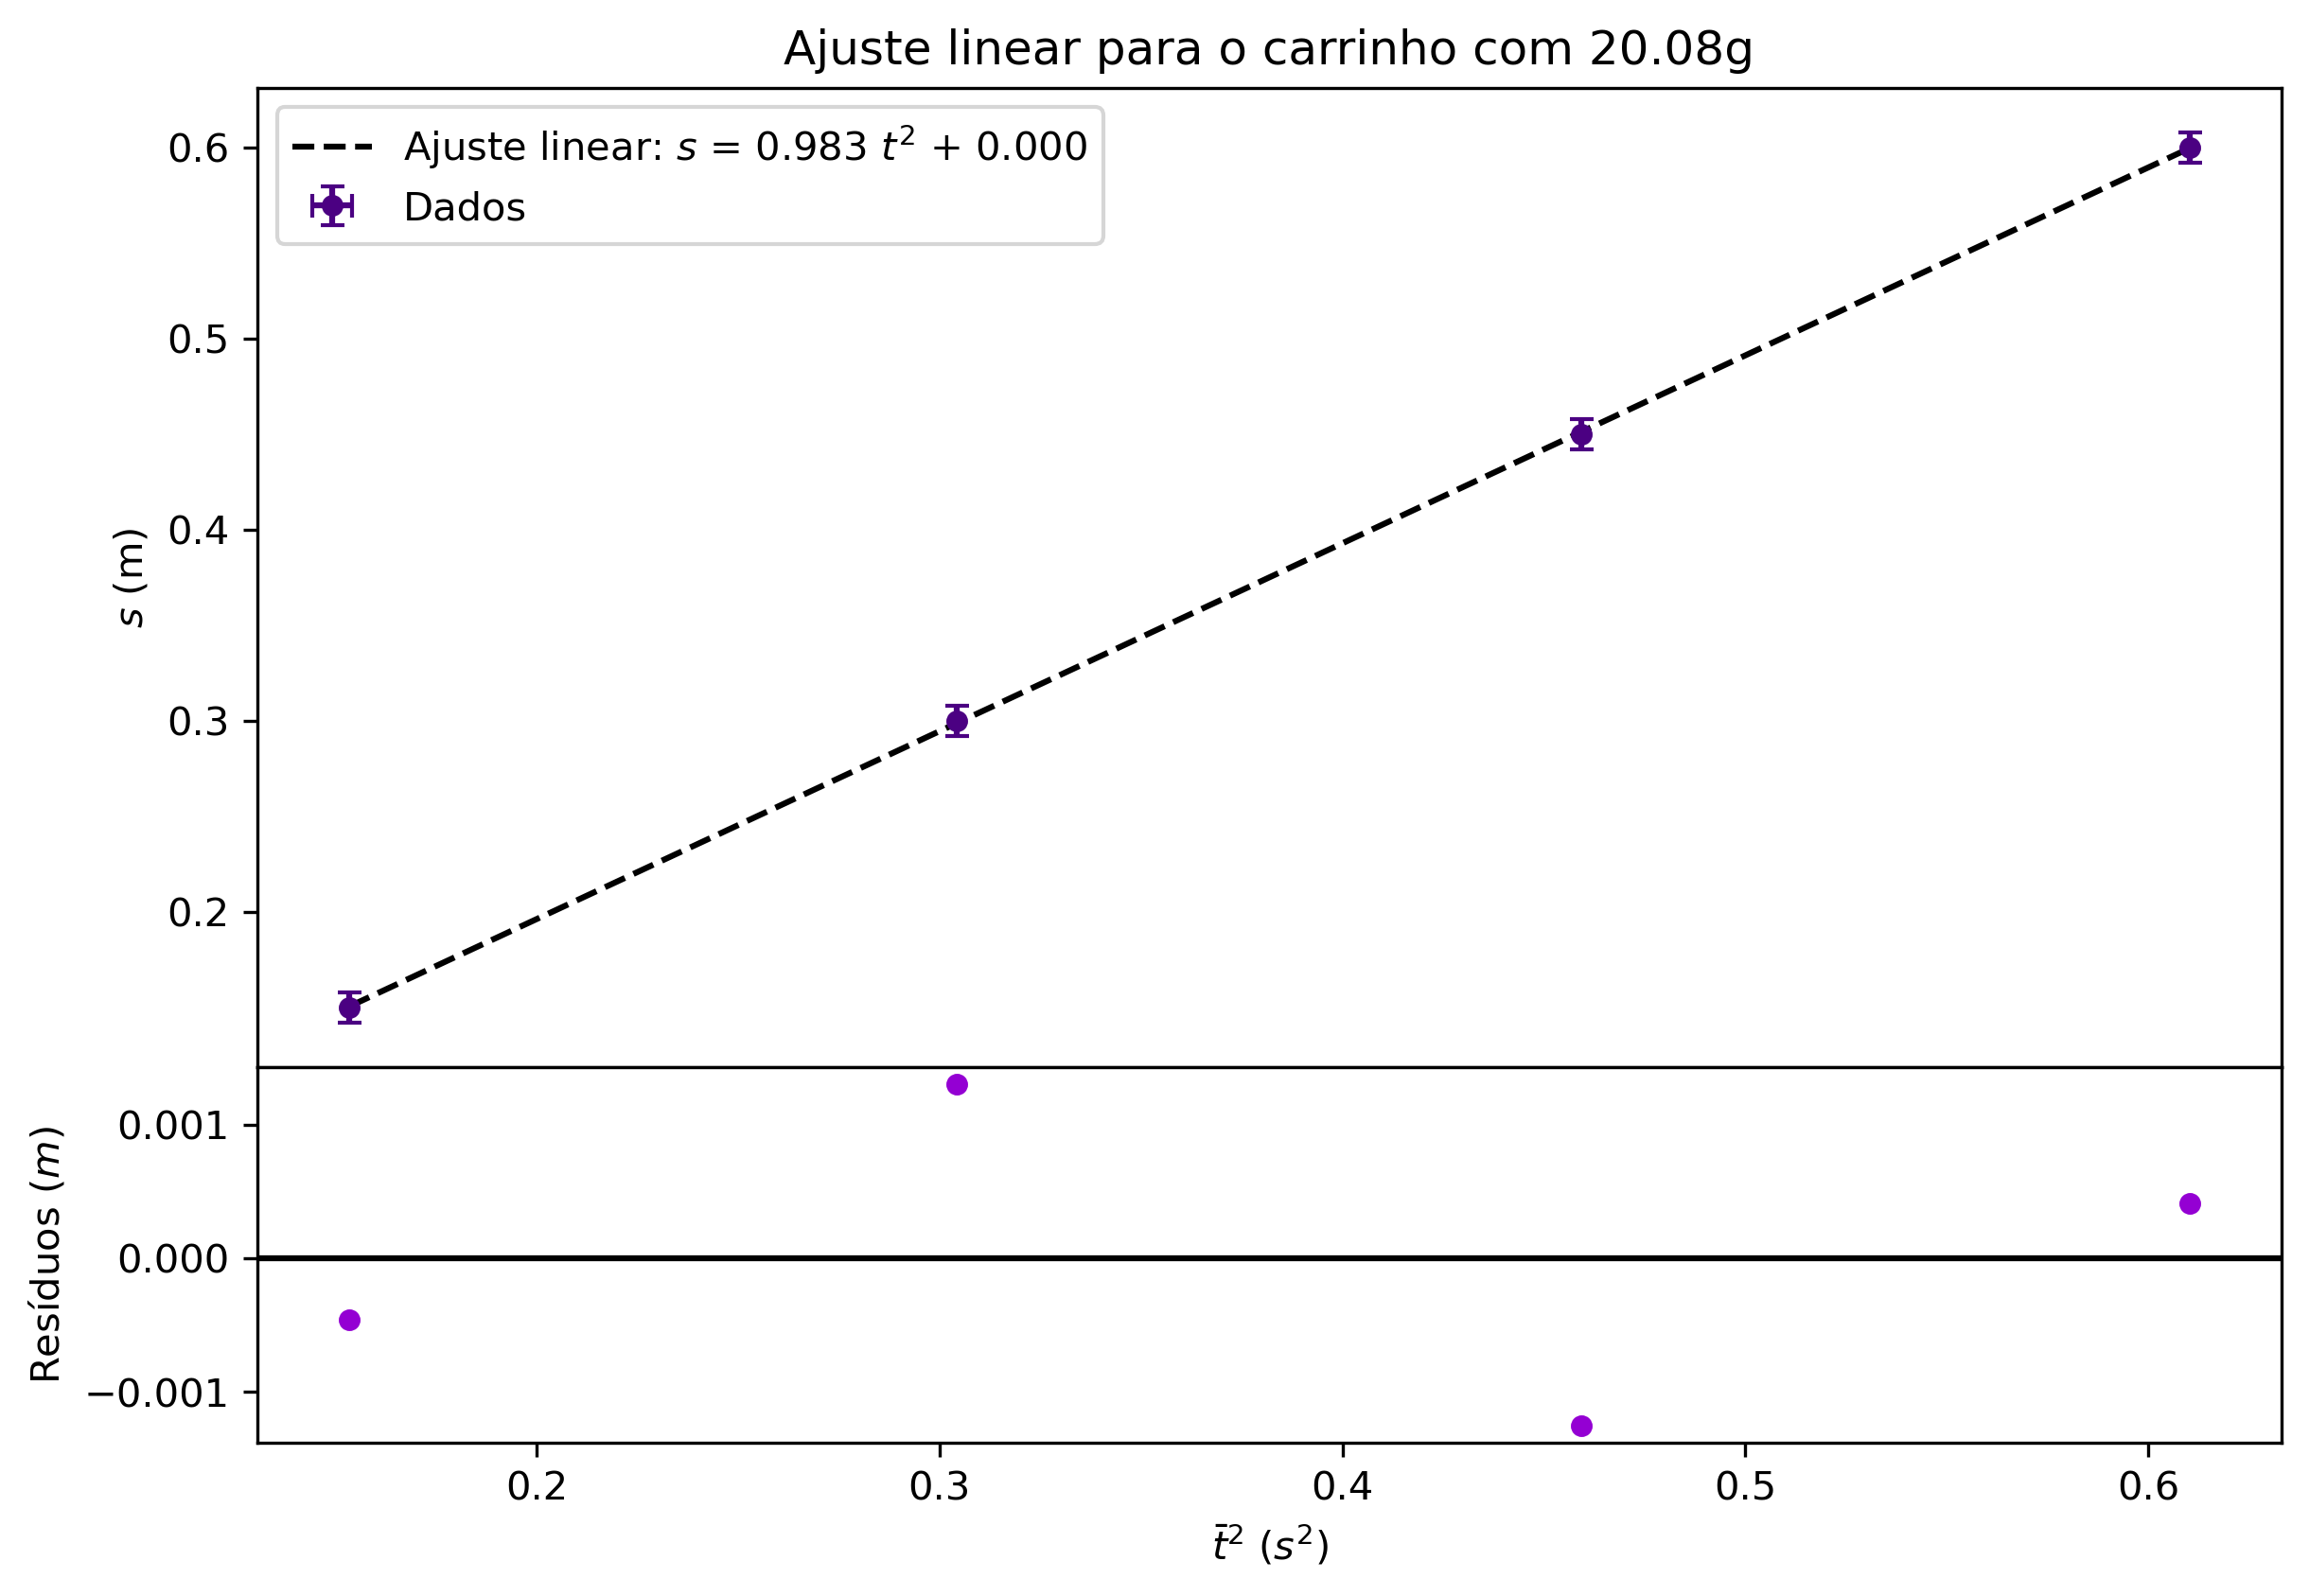

In [12]:
# Calulando chi^2_red
yhat1 = np.polyval(fitpars_10, t_sq_10)
chi_squared = np.sum(((yhat1 - s)/sigma_s) ** 2)
chi2_red = chi_squared/(len(s)-2)

#Imprimindo o resultado
print("chi^2_red = %.3f" % chi2_red)

fig = plt.figure(figsize = [9.2,6.2], dpi = 300) 
gs = fig.add_gridspec(2,1, hspace=0, height_ratios=[6, 2.3])
axs = gs.subplots(sharex=True)


#Gráfico principal
axs[0] = plt.subplot(gs[0])
axs[0].errorbar(t_sq_10,s, sigma_s,0, 'o', ms = 4.5, capsize=3, color = 'indigo', label = 'Dados')
axs[0].plot(t_sq_10,t_sq_10*coef_angular_10 + coef_linear_10, color ='black', ls = '--',
         label = r'Ajuste linear: $s$ = %.3f $t^2$ + %.3f' % (coef_angular_10,abs(coef_linear_10)))
axs[0].set_ylabel(r'$s$ (m)')
axs[0].legend()
axs[0].set_title('Ajuste linear para o carrinho com 20.08g')

#Gráfico de resíduos
axs[1] = plt.subplot(gs[1])
resid = (s - yhat1)
axs[1].plot(t_sq_10, resid, 'o',ms = 4.5,  color = 'darkviolet', label = 'Residuos')
axs[1].axhline(y=0, color='k', linestyle='-')
axs[1].set_ylabel(r"Resíduos ($m$)")




plt.xlabel(r'$\bar{t}^2$ ($s^2$)')
#plt.savefig('Graphs/ESR/AjusteResiduos_LD.pdf', dpi = 300)

plt.show()

# Ajuste linear para os dados do carrinho com 9g de cada lado

In [13]:
fitpars_9, cov_pars_9 = np.polyfit(t_sq_9,s,1,w=np.power(sigma_s,-1),cov='True')
#print(fitpars, cov_pars)

coef_angular_9 = fitpars_9[0]
coef_linear_9 = fitpars_9[1]
sigma_angular_9 = np.sqrt(cov_pars_9[0][0])
sigma_linear_9 = np.sqrt(cov_pars_9[1][1])

sigma_angular_9 = float('{:g}'.format(float('{:.1g}'.format(sigma_angular_9))))
sigma_linear_9 = float('{:g}'.format(float('{:.1g}'.format(sigma_linear_9))))

                     
print('Coeficiente angular: %.2f +- %.2f (m/s^2)' % (coef_angular_9 ,sigma_angular_9))
print('Coeficiente linear: %.3f +- %.3f (m)' %(coef_linear_9,sigma_linear_9))

Coeficiente angular: 1.04 +- 0.01 (m/s^2)
Coeficiente linear: -0.004 +- 0.004 (m)


chi^2_red = 0.178


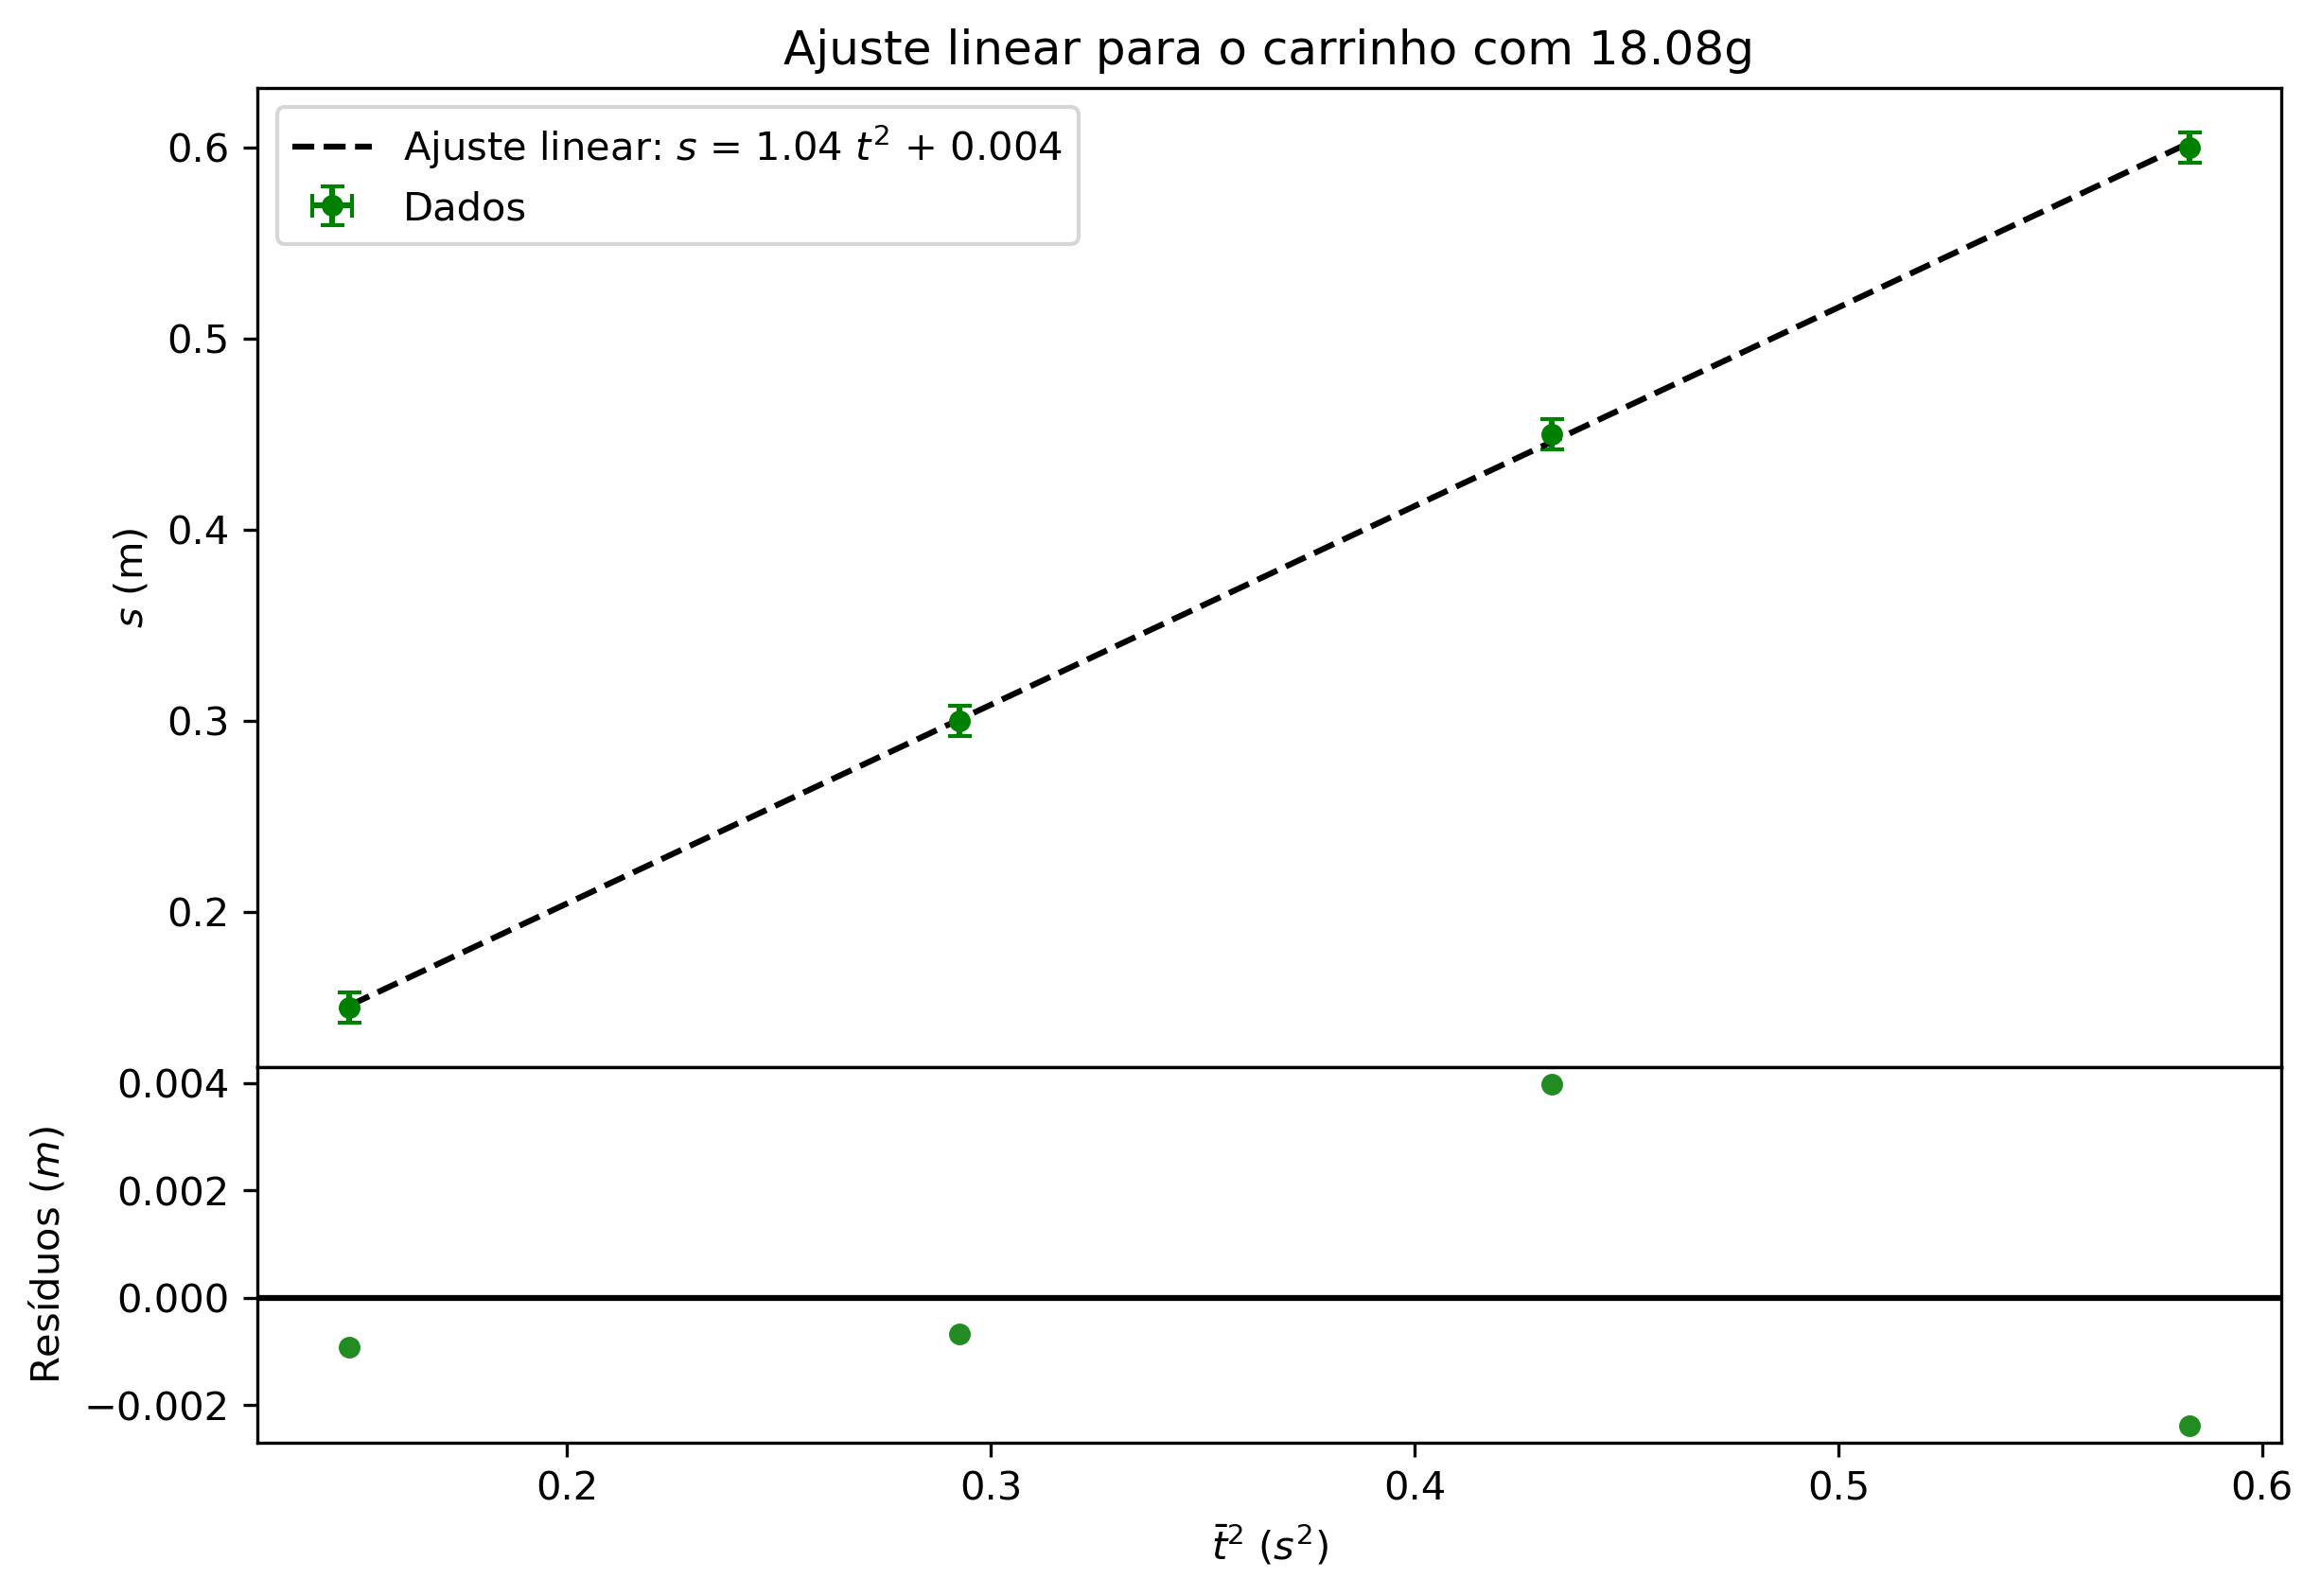

In [14]:
# Calulando chi^2_red
yhat1 = np.polyval(fitpars_9, t_sq_9)
chi_squared = np.sum(((yhat1 - s)/sigma_s) ** 2)
chi2_red = chi_squared/(len(s)-2)

#Imprimindo o resultado
print("chi^2_red = %.3f" % chi2_red)

fig = plt.figure(figsize = [9.2,6.2], dpi = 300) 
gs = fig.add_gridspec(2,1, hspace=0, height_ratios=[6, 2.3])
axs = gs.subplots(sharex=True)


#Gráfico principal
axs[0] = plt.subplot(gs[0])
axs[0].errorbar(t_sq_9,s, sigma_s,0, 'o', ms = 4.5, capsize=3, color = 'green', label = 'Dados')
axs[0].plot(t_sq_9,t_sq_9*coef_angular_9 + coef_linear_9, color ='black', ls = '--',
         label = r'Ajuste linear: $s$ = %.2f $t^2$ + %.3f' % (coef_angular_9,abs(coef_linear_9)))
axs[0].set_ylabel(r'$s$ (m)')
axs[0].legend()
axs[0].set_title('Ajuste linear para o carrinho com 18.08g')

#Gráfico de resíduos
axs[1] = plt.subplot(gs[1])
resid = (s - yhat1)
axs[1].plot(t_sq_9, resid, 'o',ms = 4.5,  color = 'forestgreen', label = 'Residuos')
axs[1].axhline(y=0, color='k', linestyle='-')
axs[1].set_ylabel(r"Resíduos ($m$)")




plt.xlabel(r'$\bar{t}^2$ ($s^2$)')
#plt.savefig('Graphs/ESR/AjusteResiduos_LD.pdf', dpi = 300)

plt.show()

# Ajuste linear para os dados do carrinho com 8g de cada lado

In [15]:
fitpars_8, cov_pars_8 = np.polyfit(t_sq_8,s,1,w=np.power(sigma_s,-1),cov='True')
#print(fitpars, cov_pars)

coef_angular_8 = fitpars_8[0]
coef_linear_8 = fitpars_8[1]
sigma_angular_8 = np.sqrt(cov_pars_8[0][0])
sigma_linear_8 = np.sqrt(cov_pars_8[1][1])

sigma_angular_8 = float('{:g}'.format(float('{:.1g}'.format(sigma_angular_8))))
sigma_linear_8 = float('{:g}'.format(float('{:.1g}'.format(sigma_linear_8))))

                     
print('Coeficiente angular: %.2f +- %.2f (m/s^2)' % (coef_angular_8 ,sigma_angular_8))
print('Coeficiente linear: %.3f +- %.3f (m)' %(coef_linear_8,sigma_linear_8))

Coeficiente angular: 1.06 +- 0.02 (m/s^2)
Coeficiente linear: -0.003 +- 0.007 (m)


chi^2_red = 0.564


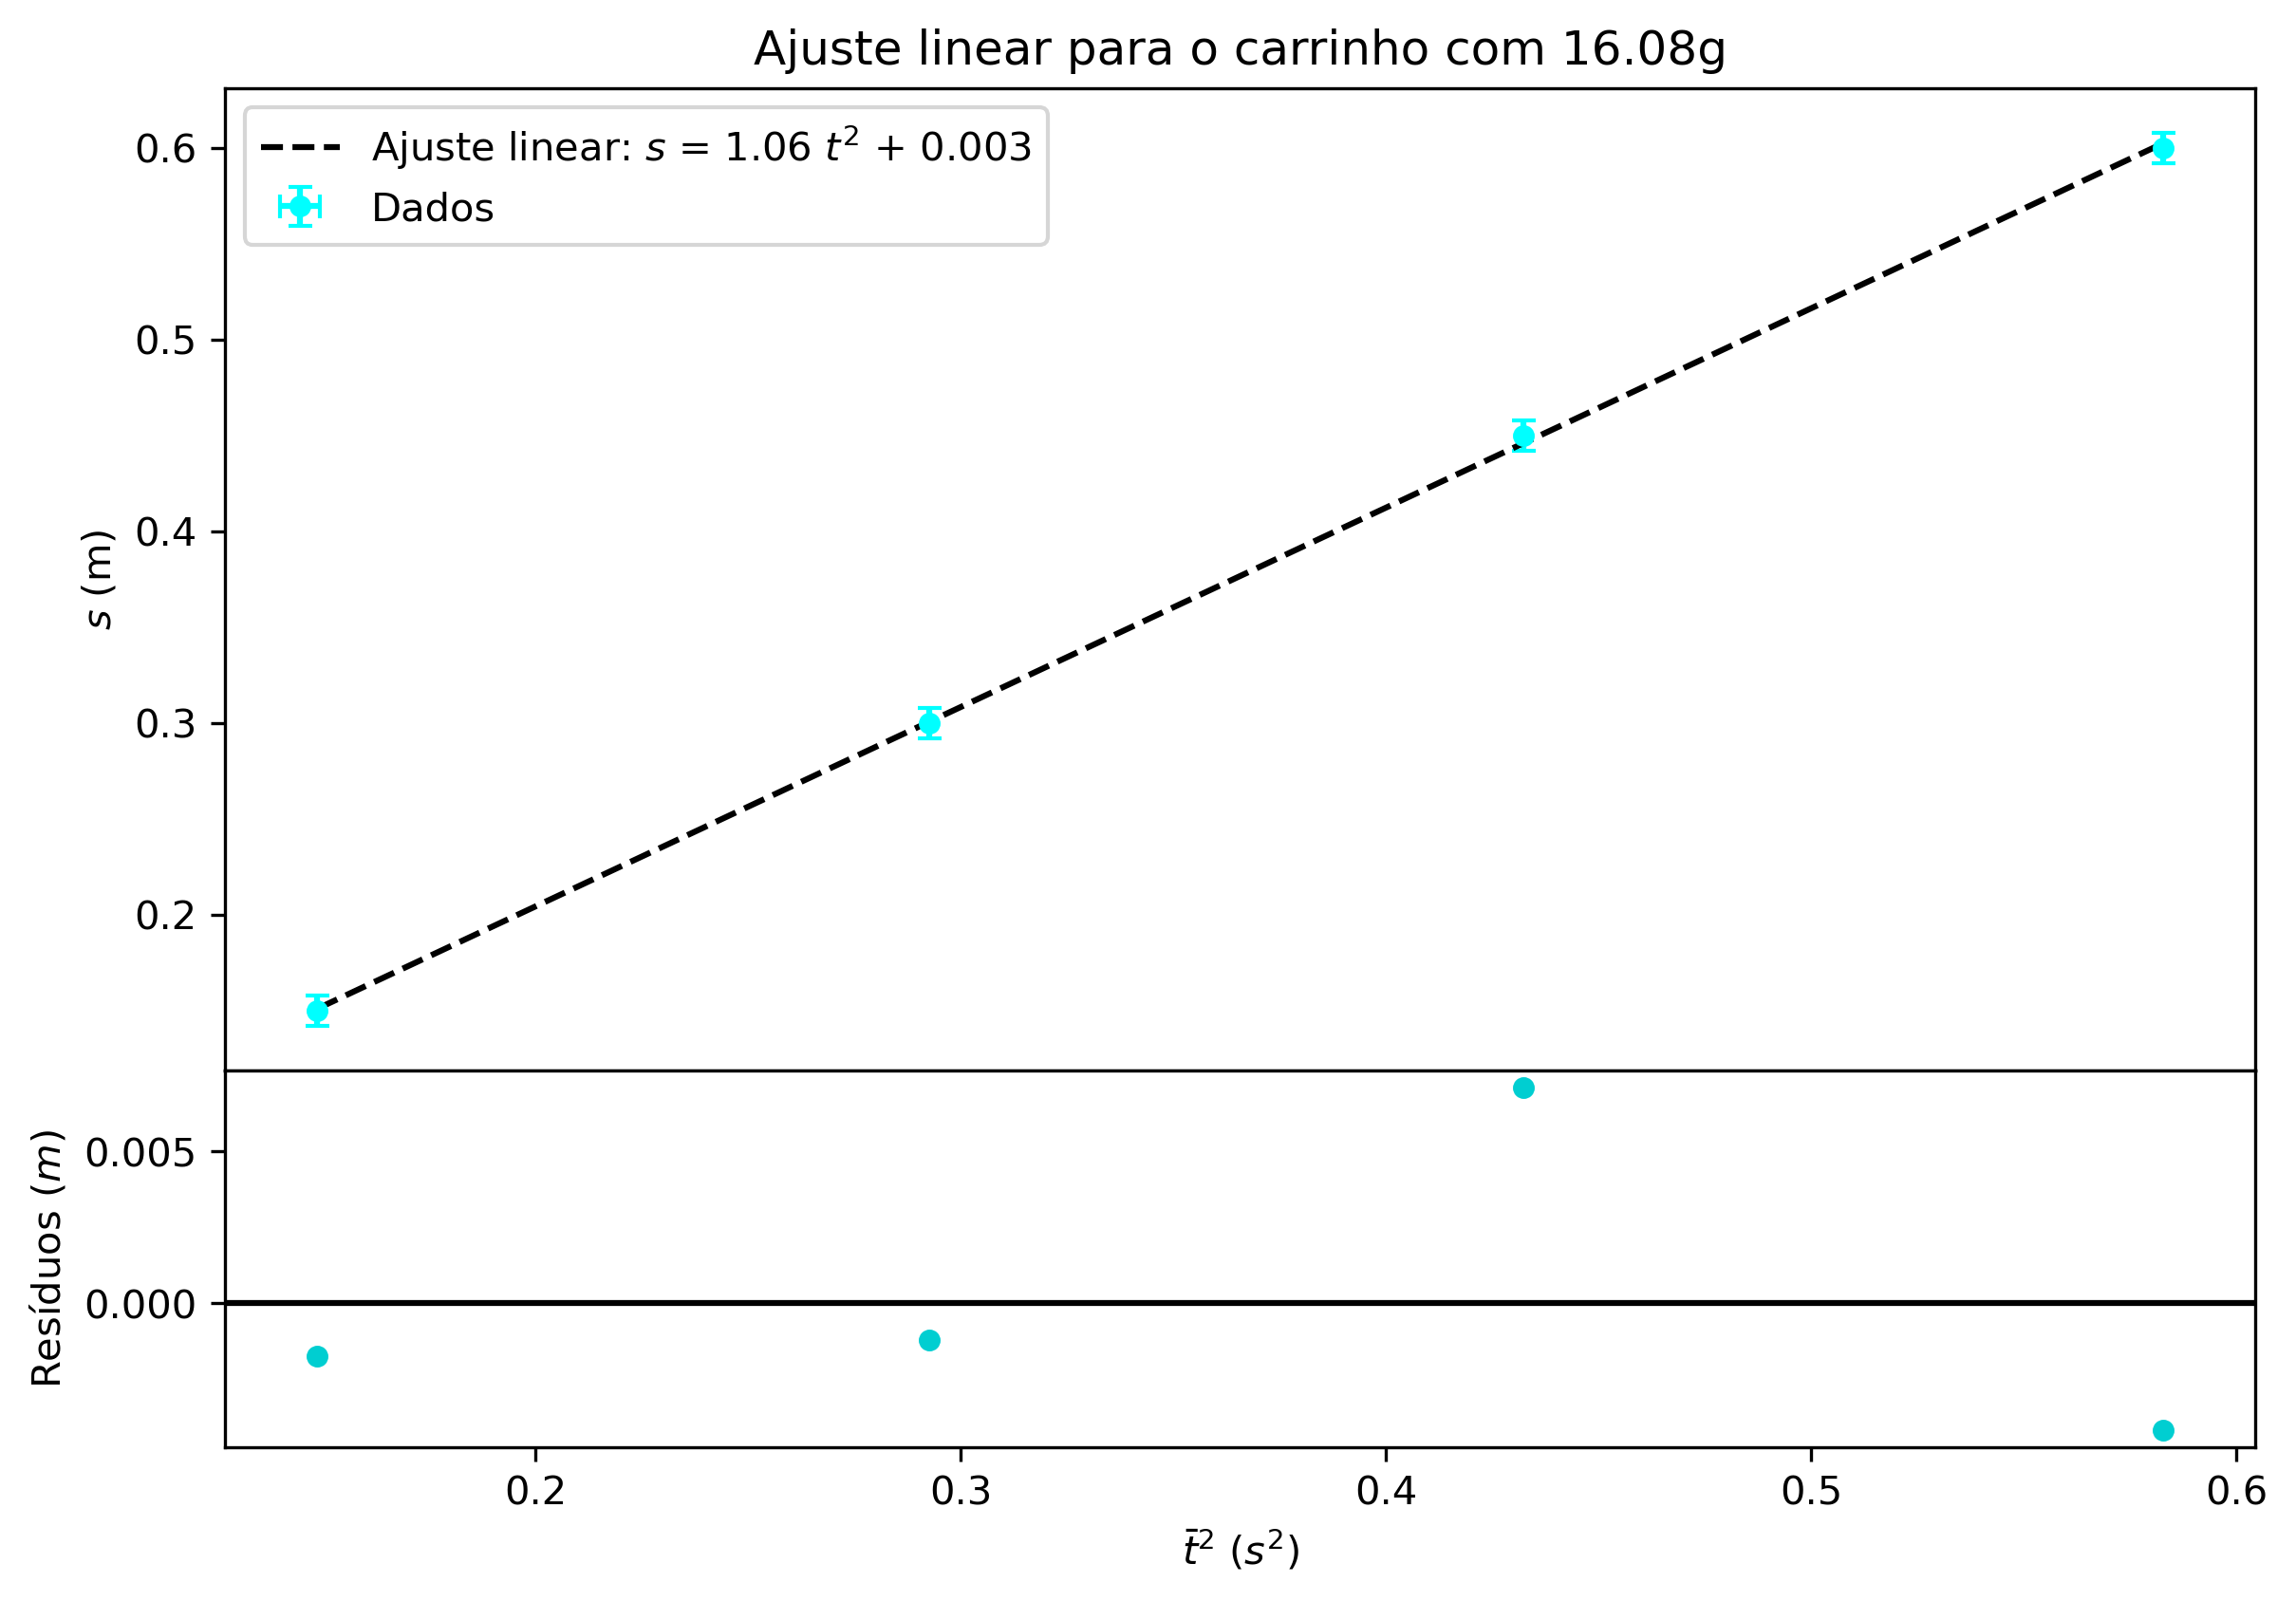

In [16]:
# Calulando chi^2_red
yhat1 = np.polyval(fitpars_8, t_sq_8)
chi_squared = np.sum(((yhat1 - s)/sigma_s) ** 2)
chi2_red = chi_squared/(len(s)-2)

#Imprimindo o resultado
print("chi^2_red = %.3f" % chi2_red)

fig = plt.figure(figsize = [9.2,6.2], dpi = 300) 
gs = fig.add_gridspec(2,1, hspace=0, height_ratios=[6, 2.3])
axs = gs.subplots(sharex=True)


#Gráfico principal
axs[0] = plt.subplot(gs[0])
axs[0].errorbar(t_sq_9,s, sigma_s,0, 'o', ms = 4.5, capsize=3, color = 'cyan', label = 'Dados')
axs[0].plot(t_sq_9,t_sq_9*coef_angular_9 + coef_linear_9, color ='black', ls = '--',
         label = r'Ajuste linear: $s$ = %.2f $t^2$ + %.3f' % (coef_angular_8,abs(coef_linear_8)))
axs[0].set_ylabel(r'$s$ (m)')
axs[0].legend()
axs[0].set_title('Ajuste linear para o carrinho com 16.08g')

#Gráfico de resíduos
axs[1] = plt.subplot(gs[1])
resid = (s - yhat1)
axs[1].plot(t_sq_9, resid, 'o',ms = 4.5,  color = 'darkturquoise', label = 'Residuos')
axs[1].axhline(y=0, color='k', linestyle='-')
axs[1].set_ylabel(r"Resíduos ($m$)")




plt.xlabel(r'$\bar{t}^2$ ($s^2$)')
#plt.savefig('Graphs/ESR/AjusteResiduos_LD.pdf', dpi = 300)

plt.show()

# Ajuste linear para os dados do carrinho com 7g de cada lado

In [17]:
fitpars_7, cov_pars_7 = np.polyfit(t_sq_7,s,1,w=np.power(sigma_s,-1),cov='True')
#print(fitpars, cov_pars)

coef_angular_7 = fitpars_7[0]
coef_linear_7 = fitpars_7[1]
sigma_angular_7 = np.sqrt(cov_pars_7[0][0])
sigma_linear_7 = np.sqrt(cov_pars_7[1][1])

sigma_angular_7 = float('{:g}'.format(float('{:.1g}'.format(sigma_angular_7))))
sigma_linear_7 = float('{:g}'.format(float('{:.1g}'.format(sigma_linear_7))))

                     
print('Coeficiente angular: %.3f +- %.3f (m/s^2)' % (coef_angular_7 ,sigma_angular_7))
print('Coeficiente linear: %.3f +- %.3f (m)' %(coef_linear_7,sigma_linear_7))

Coeficiente angular: 1.106 +- 0.020 (m/s^2)
Coeficiente linear: -0.003 +- 0.006 (m)


chi^2_red = 0.382


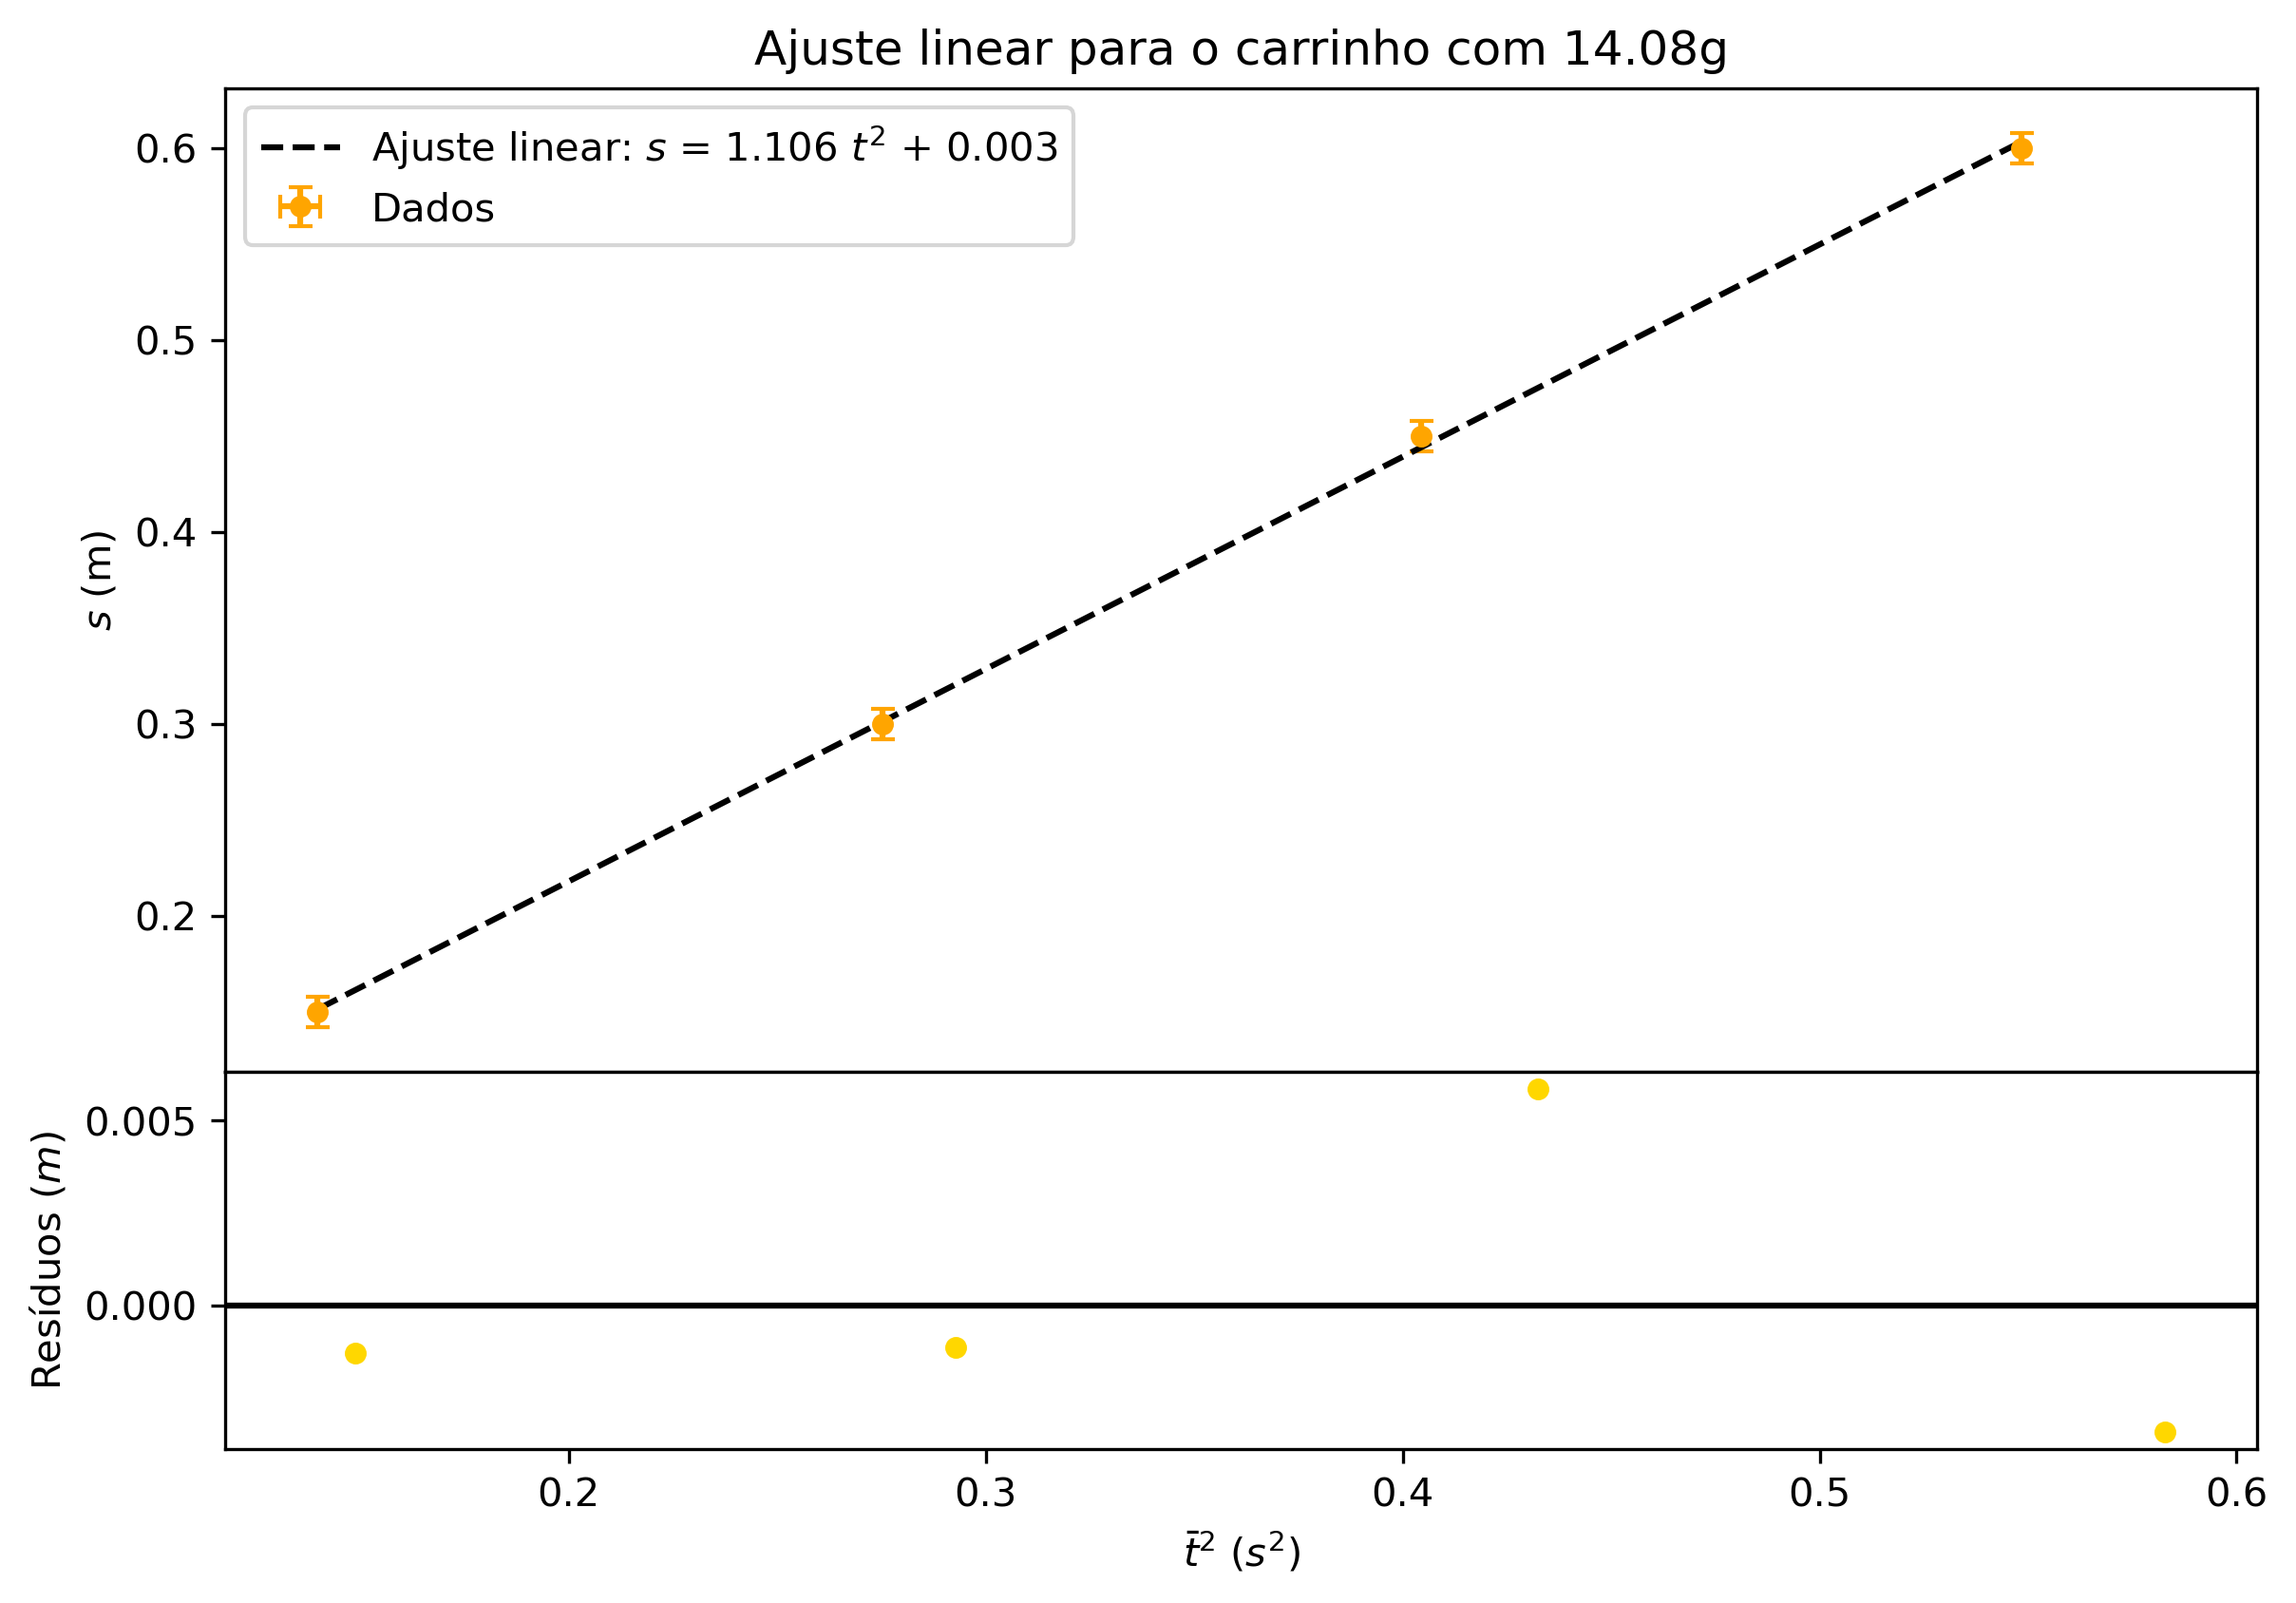

In [18]:
# Calulando chi^2_red
yhat1 = np.polyval(fitpars_7, t_sq_7)
chi_squared = np.sum(((yhat1 - s)/sigma_s) ** 2)
chi2_red = chi_squared/(len(s)-2)

#Imprimindo o resultado
print("chi^2_red = %.3f" % chi2_red)

fig = plt.figure(figsize = [9.2,6.2], dpi = 300) 
gs = fig.add_gridspec(2,1, hspace=0, height_ratios=[6, 2.3])
axs = gs.subplots(sharex=True)


#Gráfico principal
axs[0] = plt.subplot(gs[0])
axs[0].errorbar(t_sq_7,s, sigma_s,0, 'o', ms = 4.5, capsize=3, color = 'orange', label = 'Dados')
axs[0].plot(t_sq_7,t_sq_7*coef_angular_7 + coef_linear_7, color ='black', ls = '--',
         label = r'Ajuste linear: $s$ = %.3f $t^2$ + %.3f' % (coef_angular_7,abs(coef_linear_7)))
axs[0].set_ylabel(r'$s$ (m)')
axs[0].legend()
axs[0].set_title('Ajuste linear para o carrinho com 14.08g')

#Gráfico de resíduos
axs[1] = plt.subplot(gs[1])
resid = (s - yhat1)
axs[1].plot(t_sq_9, resid, 'o',ms = 4.5,  color = 'gold', label = 'Residuos')
axs[1].axhline(y=0, color='k', linestyle='-')
axs[1].set_ylabel(r"Resíduos ($m$)")




plt.xlabel(r'$\bar{t}^2$ ($s^2$)')
#plt.savefig('Graphs/ESR/AjusteResiduos_LD.pdf', dpi = 300)

plt.show()

# Obtendo a aceleração através do coeficiente angular:


Conforme discutido na introdução, a mecânica Newtoniana prevê que a relação entre o deslocamento e o tempo é dada pela seguinte equação:

$$s = \frac{a}{2}t^2$$

Comparando com o ajuste $s = c_a \bar{t}^2 + c_l$, nós vemos que o coeficiente angular corresponde a metade da aceleração do carrinho:

$$c_a = \frac{a}{2}$$

Além disto, vemos que o esperado para a teoria é que o coeficiente linear seja nulo. A fim de encontrarmos a aceleração do carrinho, podemos isolá-la na equação acima:

$$a = 2c_a$$

A incerteza associada a aceleração é obtida através da propagação do erro do coeficiente angular da seguinte forma:

$$\sigma_a = \bigg\vert\frac{d a}{dc_a}\bigg\vert\sigma_{c_a} = 2\bigg\vert\frac{d c_a}{dc_a}\bigg\vert\sigma_{c_a} = 2\sigma_{c_a}$$

In [19]:
#Aceleração para o conjunto de dados do carrinho com 10g de cada lado:
a_10 = 2*coef_angular_10
sigma_a_10 = 2*sigma_angular_10

print('a_20 = (%.2f +- %.2f) m/s^2' % (a_10, sigma_a_10))

#Aceleração para o conjunto de dados do carrinho com 9g de cada lado:

a_9 = 2*coef_angular_9
sigma_a_9 = 2*sigma_angular_9

print('a_18 = (%.2f +- %.2f) m/s^2' % (a_9, sigma_a_9))

#Aceleração para o conjunto de dados do carrinho com 8g de cada lado:

a_8 = 2*coef_angular_8
sigma_a_8 = 2*sigma_angular_8

print('a_16 = (%.2f +- %.2f) m/s^2' % (a_8, sigma_a_8))

#Aceleração para o conjunto de dados do carrinho com 7g de cada lado:

a_7 = 2*coef_angular_7
sigma_a_7 = 2*sigma_angular_7

print('a_14 = (%.2f +- %.2f) m/s^2' % (a_7, sigma_a_7))



#criando um vetor com as acelerações:

a = np.array([a_10, a_9, a_8, a_7])
sigma_a = np.array([sigma_a_10, sigma_a_9, sigma_a_8, sigma_a_7])

a_20 = (1.97 +- 0.01) m/s^2
a_18 = (2.08 +- 0.02) m/s^2
a_16 = (2.13 +- 0.04) m/s^2
a_14 = (2.21 +- 0.04) m/s^2


In [20]:
force = (m_c+m_s)*a
print((force ))

[0.54442536 0.57584092 0.58910462 0.61231449]


In [21]:
g=9.81 #m/s^2
print(np.round(g * m_s/(m_s + m_c),2))

[1.93 2.04 2.07 2.14]


# Calculando a força resultante em cada caso

A força resultante é a força peso na massa suspensa:

$$F_r = P_s = m_s \ g$$

Sua incerteza é obtida através da propagação associada ao erro da massa suspensa:

$$\sigma_{F_r} = \bigg\vert\frac{d F_r}{d m_s}\bigg\vert \sigma_{m_s} = \bigg\vert\frac{d m_s \ g}{d m_s}\bigg\vert \sigma_{m_s} = g \ \sigma_{m_s}$$


In [22]:
f_r = []
sigma_f_r = []
g = 9.81 #m/s^2
for i,m in enumerate(m_s):
    #f_r.append(m*g+m_c[i]*g*0.00434969)
    f_r.append(m*g)
    sigma_f_r.append(float('{:g}'.format(float('{:.1g}'.format(g*sigma_m_s[i])))))
    
f_r = np.array(f_r)
sigma_f_r = np.array(sigma_f_r)
    
print(np.round(f_r,3))
print(sigma_f_r)

[0.535 0.564 0.574 0.594]
[0.001 0.001 0.001 0.001]


## Dados brutos de força resultante Vs aceleração


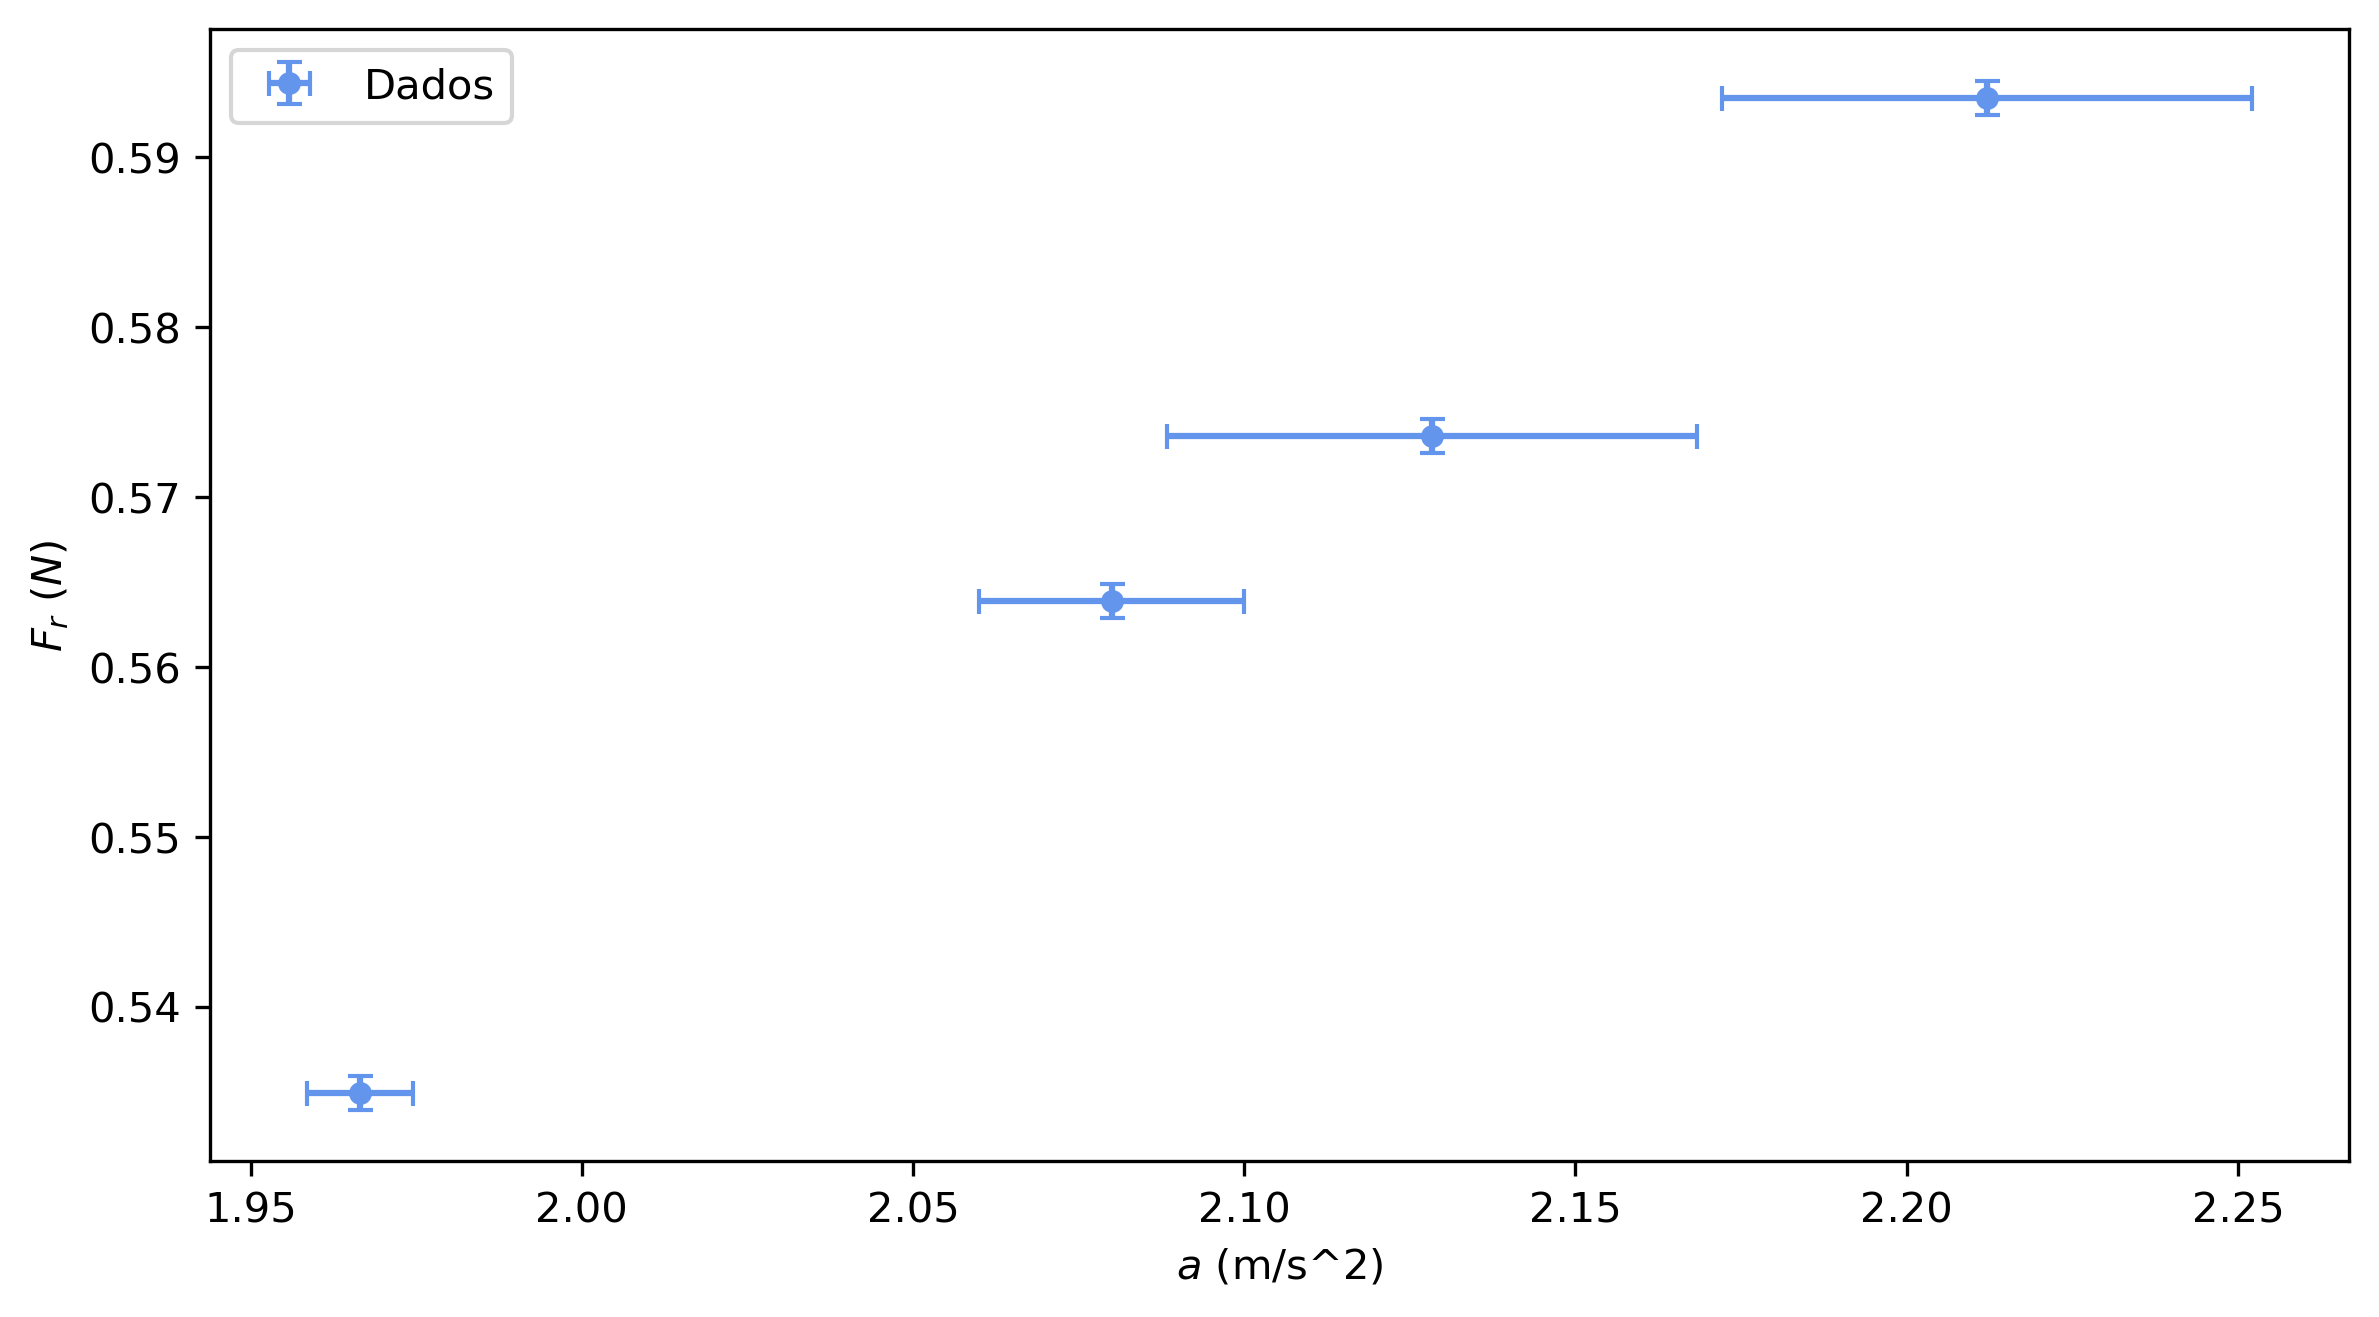

In [23]:
plt.figure(figsize = [9.2,4.9], dpi = 300) 
plt.errorbar(a,f_r,sigma_f_r,sigma_a, 'o', ms = 4.5, capsize=3, color = 'cornflowerblue', label = 'Dados')
plt.ylabel(r'$F_r$ ($N$)')
plt.xlabel(r'$a$ (m/s^2)')
plt.title('')
plt.legend()
#plt.savefig('Graphs/ChargeMass/Dadosbrutos.pdf')
plt.show()

## Transferência de incerteza:

$$\sigma'_{F_r} = \sqrt{\sigma_{F_r}^2 + \bigg(\frac{\partial F_r}{\partial a}\bigg)^2\sigma_{a}^2}$$


Onde $\frac{\partial F_r}{\partial a}$ é aproximadamente o coeficiente angular do ajuste envolvendo $F_{r}$ e $a$.

In [24]:
#Transferência de incerteza

#Calculando dQ/dx
fit = np.polyfit(a, f_r,1) 

#Calculando a incerteza transferida:
incytransf = np.sqrt(sigma_f_r**2+ (fit[0]*sigma_a)**2)

#Dois algarismos significativos
incytransf = [float('{:g}'.format(float('{:.1g}'.format(i)))) for i in incytransf]

print(incytransf)

[0.002, 0.005, 0.01, 0.01]


## Ajuste linear 

In [25]:
fitpars, cov_pars = np.polyfit(a,f_r,1,w=np.power(incytransf,-1),cov='True')
#print(fitpars, cov_pars)

coef_angular = fitpars[0]
coef_linear = fitpars[1]
sigma_angular = np.sqrt(cov_pars[0][0])
sigma_linear = np.sqrt(cov_pars[1][1])

sigma_angular = float('{:g}'.format(float('{:.1g}'.format(sigma_angular))))
sigma_linear = float('{:g}'.format(float('{:.1g}'.format(sigma_linear))))

                     
print('Coeficiente angular: %.3f +- %.3f (kg)' % (coef_angular ,sigma_angular))
print('Coeficiente linear: %.2f +- %.2f (N)' %(coef_linear,sigma_linear))

Coeficiente angular: 0.244 +- 0.006 (kg)
Coeficiente linear: 0.05 +- 0.01 (N)


## Gráfico do ajuste

In [26]:
#Calulando chi^2_red
yhat = np.polyval(fitpars, a)
chi_squared = np.sum(((yhat - f_r)/incytransf) ** 2)
chi2_red = chi_squared/(len(f_r)-2)

#Imprimindo o resultado
print("chi^2_red = %.3f" % chi2_red)

chi^2_red = 0.043


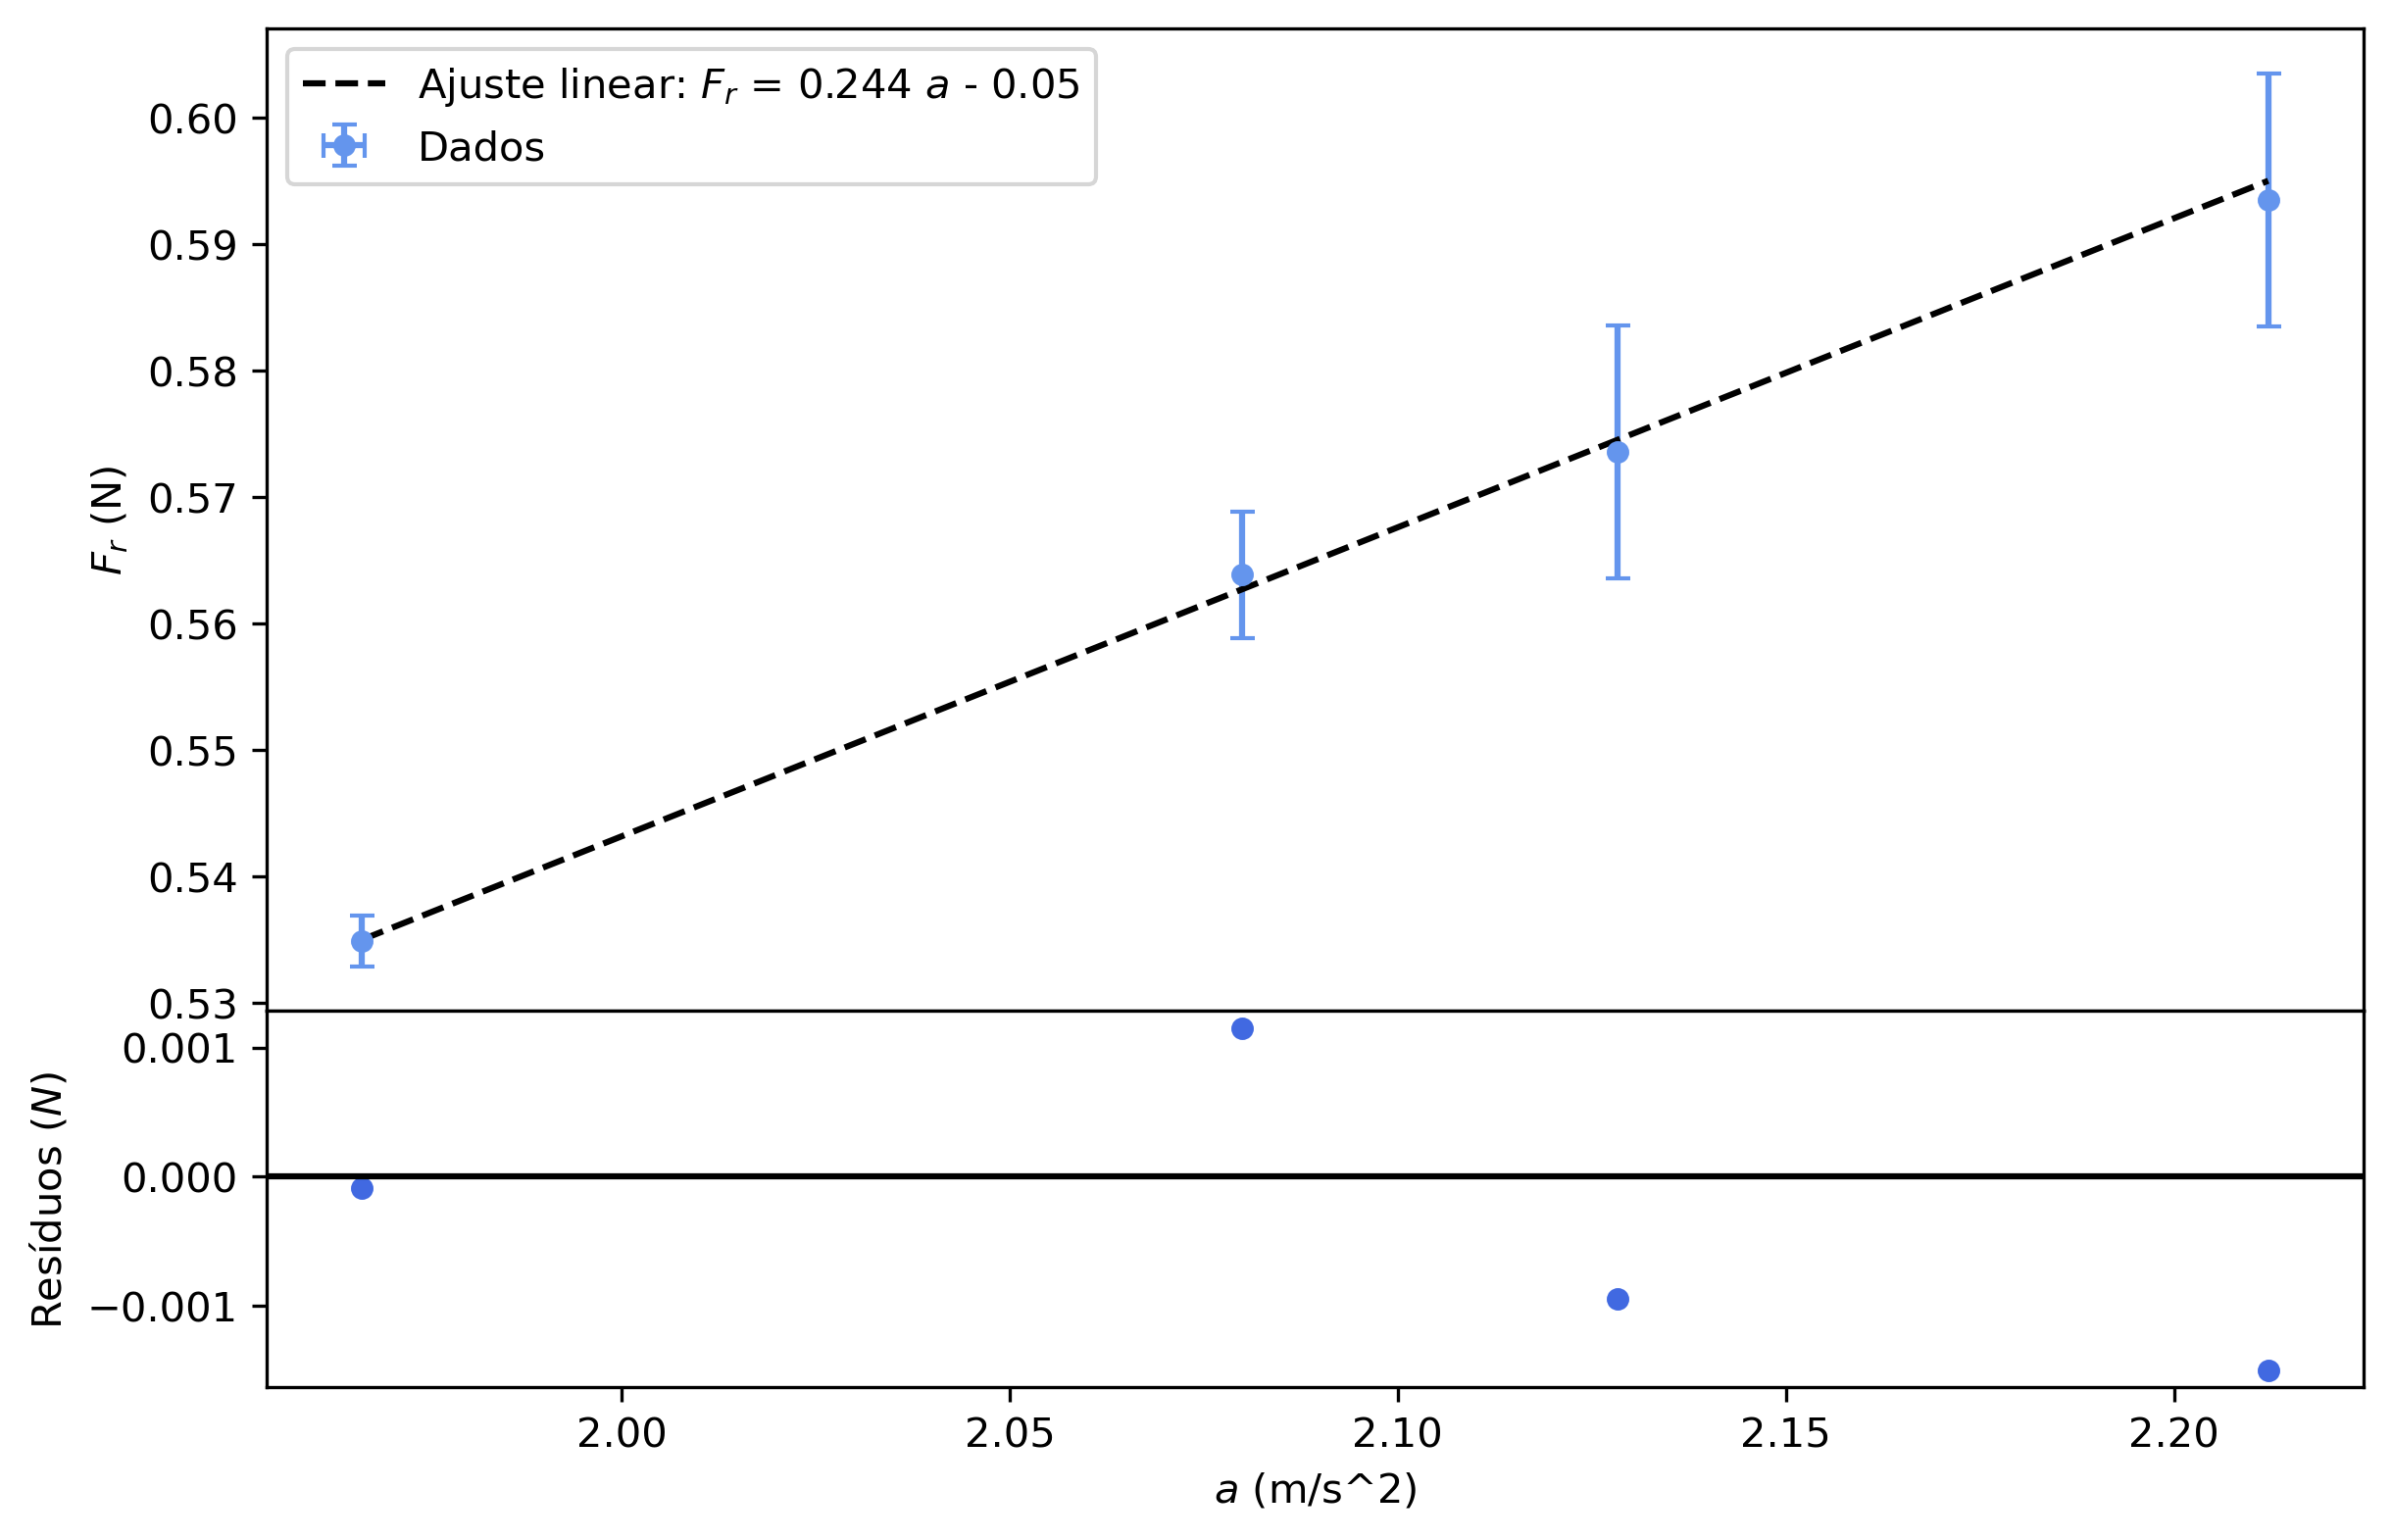

In [27]:
fig = plt.figure(figsize = [9.2,6], dpi = 300) 
gs = fig.add_gridspec(2,1, hspace=0, height_ratios=[6, 2.3])
axs = gs.subplots(sharex=True)


#Gráfico principal
axs[0] = plt.subplot(gs[0])
axs[0].errorbar(a,f_r, incytransf,0, 'o', ms = 4.5, capsize=3, color = 'cornflowerblue', label = 'Dados')
axs[0].plot(a,(a*coef_angular + coef_linear), color ='black', ls = '--',
         label = r'Ajuste linear: $F_r$ = %.3f $a$ - %.2f' % (coef_angular,abs(coef_linear)))
axs[0].set_ylabel(r'$F_r$ (N)')
axs[0].legend()
axs[0].set_title('')

#Gráfico de resíduos
axs[1] = plt.subplot(gs[1])
resid = (f_r - yhat)
axs[1].plot(a, resid, 'o',ms = 4.5,  color = 'royalblue', label = 'Residuos')
axs[1].axhline(y=0, color='k', linestyle='-')
axs[1].set_ylabel(r"Resíduos ($N$)")

#axs[0].plot(a,(a*0.2768), color ='black', ls = '--',
         #label = r'Ajuste linear: $F_r$ = %.3f $a$ - %.2f' % (coef_angular,abs(coef_linear)))

plt.xlabel(r'$a$ (m/s^2)')
#plt.savefig('Graphs/ESR/AjusteResiduos_3B.pdf', dpi = 300)

plt.show()

In [28]:
print(1 - 300/276.95)

-0.08322801949810432


$$\sigma_{F_r} = \sqrt{\left(\frac{\partial F_r}{\partial m_c}\right)^2 \sigma_{m_c}^2 + \left(\frac{\partial F_r}{\partial m_s}\right)^2 \sigma_{m_s}^2 + \left(\frac{\partial F_r}{\partial a}\right)^2 \sigma_{a}^2 }$$


$$\sigma_{F_r} = \sqrt{\left(\frac{\partial (m_c + m_s)a}{\partial m_c}\right)^2 \sigma_{m_c}^2 + \left(\frac{\partial (m_c + m_s)a}{\partial m_s}\right)^2 \sigma_{m_s}^2 + \left(\frac{\partial (m_c + m_s)a}{\partial a}\right)^2 \sigma_{a}^2 }$$

$$\sigma_{F_r} = \sqrt{\left(a\sigma_{m_c}\right)^2  + \left(a\sigma_{m_s}\right)^2  + \left((m_c + m_s)\sigma_{a}\right)^2  }$$
$$\sigma_{F_r} = \sqrt{a^2\left(\sigma_{m_c}^2 + \sigma_{m_s}^2\right)   + \left((m_c + m_s)\sigma_{a}\right)^2  }$$

In [29]:
print(m_c+m_s)

[0.27684 0.27685 0.27679 0.2768 ]
